In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import itertools
from datetime import timedelta
import math

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.tri import Triangulation
import matplotlib.ticker as mticker

from sklearn.utils import resample

import os
import pathlib
import sys

sys.path.append(str(pathlib.Path(os.getcwd()).parent))

from tools import eval_tools, cal_print_metrics

rmse = eval_tools.get_module_class('metrics', 'rmse')()

main_dir = '/Users/leec813/GitHub/WE-Validate/'

## Time series

In [4]:
def read_ts_df(case, org):

    df = pd.read_csv(main_dir+'output/'+case+'/ts_'+org+'.csv', header=[0, 1, 2], index_col=[0])
    df.index = pd.to_datetime(df.index)
    
    return df

### US case

In [3]:
case = 'us'

df_p2 = read_ts_df(case, 'p2')
df_p4 = read_ts_df(case, 'p4')
df_p1 = read_ts_df(case, 'p1')
df_p5 = read_ts_df(case, 'p5')

# df.columns.levels[1]
# df['40'][df.columns.levels[1][0]].columns == 'sodar_ws'
# df.columns.levels[2]

In [5]:
def plot_us_ws_ts(lev, case):
    
    lev = str(lev)

    colormap = plt.cm.gist_ncar

    fig, ax = plt.subplots()
    
    al_pha = 0.6

#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0.45, 0.6, 75))))

    for i in np.arange(1, 76): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_p5.index, df_p5[lev]['p5-'+i]['p5-'+i+'_ws'], 
                    c='deepskyblue', label='p5', alpha=al_pha, linewidth=0.9)
        else: 
            ax.plot(df_p5.index, df_p5[lev]['p5-'+i]['p5-'+i+'_ws'], 
                    c='deepskyblue', label='_nolegend_', alpha=al_pha, linewidth=0.9)
            
#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greens(np.linspace(0.45, 1, 8))))

    for i in np.arange(1, 9): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_p4.index, df_p4[lev]['p4-'+i]['p4-'+i+'_ws'], c='darkgreen', label='p4', alpha=al_pha)
        else:
            ax.plot(df_p4.index, df_p4[lev]['p4-'+i]['p4-'+i+'_ws'], c='darkgreen', label='_nolegend_', alpha=al_pha)

    #     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0.7, 1, 2))))

    ax.plot(df_p2.index, df_p2[lev]['p2-1']['p2-1_ws'], c='b', label='p2', alpha=al_pha)
    ax.plot(df_p2.index, df_p2[lev]['p2-2']['p2-2_ws'], c='b', label='_nolegend_', alpha=al_pha)
            
    ax.plot(df_p1.index, df_p1[lev]['p1']['p1_ws'], label='p1', c='orange')

    ax.plot(df_p1.index, df_p1[lev]['p1']['sodar_ws'], label='sodar', c='k', linewidth=2.5)

    var_txt = 'wind speed at '+lev+' m'
    
    plt.xticks(rotation=90)
    plt.xlabel('Date and UTC time')
    plt.ylabel(var_txt+r' [m s$^{-1}$]')
    plt.title(case+' case: '+var_txt)
    plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
    plt.show()

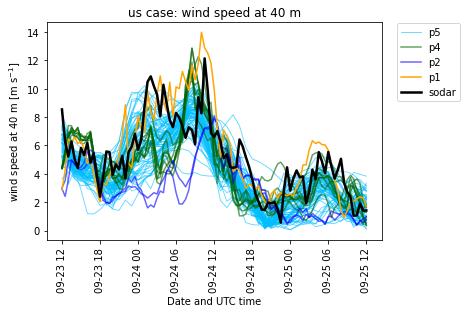

In [6]:
plot_us_ws_ts(40, case)

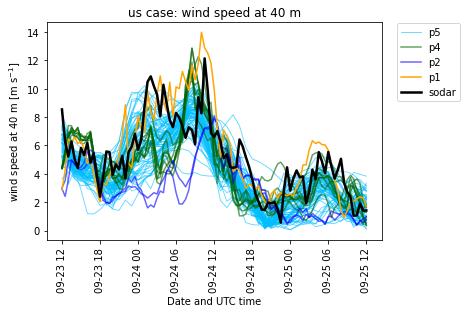

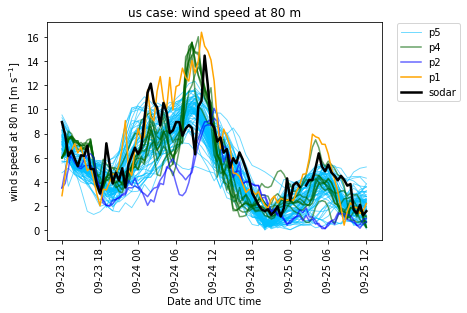

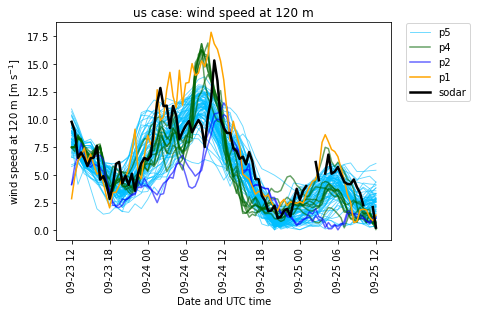

In [11]:
plot_us_ws_ts(40, case)
plot_us_ws_ts(80, case)
plot_us_ws_ts(120, case)

In [7]:
def plot_us_ws_diffmean(lev, case):

    lev = str(lev)

    colormap = plt.cm.gist_ncar

    fig, ax = plt.subplots()

    al_pha = 0.6

    #     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0.45, 0.6, 75))))

    sodar_dev = df_p2[lev]['p2-1']['sodar_ws']-df_p2[lev]['p2-1']['sodar_ws'].mean()
    sodar_dev_p5 = df_p5[lev]['p5-1']['sodar_ws']-df_p5[lev]['p5-1']['sodar_ws'].mean()

    for i in np.arange(1, 76): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_p5.index, df_p5[lev]['p5-'+i]['p5-'+i+'_ws']\
                    -df_p5[lev]['p5-'+i]['p5-'+i+'_ws'].mean()-sodar_dev_p5, 
                    c='deepskyblue', label='p5', alpha=al_pha, linewidth=0.9)
        else: 
            ax.plot(df_p5.index, df_p5[lev]['p5-'+i]['p5-'+i+'_ws']\
                    -df_p5[lev]['p5-'+i]['p5-'+i+'_ws'].mean()-sodar_dev_p5, 
                    c='deepskyblue', label='_nolegend_', alpha=al_pha, linewidth=0.9)

    #     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greens(np.linspace(0.45, 1, 8))))

    for i in np.arange(1, 9): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_p4.index, df_p4[lev]['p4-'+i]['p4-'+i+'_ws']\
                    -df_p4[lev]['p4-'+i]['p4-'+i+'_ws'].mean()-sodar_dev, 
                    c='darkgreen', label='p4', alpha=al_pha)
        else:
            ax.plot(df_p4.index, df_p4[lev]['p4-'+i]['p4-'+i+'_ws']\
                    -df_p4[lev]['p4-'+i]['p4-'+i+'_ws'].mean()-sodar_dev, 
                    c='darkgreen', label='_nolegend_', alpha=al_pha)

    #     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0.7, 1, 2))))

    ax.plot(df_p2.index, df_p2[lev]['p2-1']['p2-1_ws']-df_p2[lev]['p2-1']['p2-1_ws'].mean()-sodar_dev, 
            c='b', label='p2', alpha=al_pha)
    ax.plot(df_p2.index, df_p2[lev]['p2-2']['p2-2_ws']-df_p2[lev]['p2-2']['p2-2_ws'].mean()-sodar_dev, 
            c='b', label='_nolegend_', alpha=al_pha)

    ax.plot(df_p1.index, df_p1[lev]['p1']['p1_ws']\
            -df_p1[lev]['p1']['p1_ws'].mean()-sodar_dev, 
            label='p1', c='orange')

    # ax.plot(df_p2.index, df_p2[lev]['p22km']['sodar_ws']-df_p2[lev]['p22km']['sodar_ws'].mean(), 
    #         label='sodar', c='k', linewidth=2.5)

    var_txt = 'wind speed difference from mean at '+lev+' m'

    plt.xticks(rotation=90)
    plt.xlabel('Date and UTC time')
    plt.ylabel(var_txt+r' [m s$^{-1}$]')
    plt.title(case+' case: '+var_txt)
    plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
    plt.show()

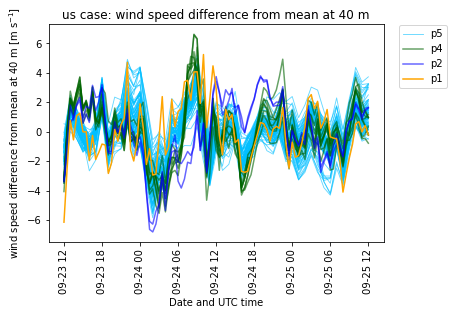

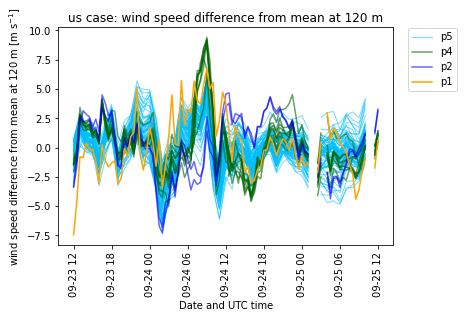

In [10]:
plot_us_ws_diffmean(40, case)
plot_us_ws_diffmean(120, case)

### EU cases

In [392]:
def plot_eu_ws_ts(lev, case):
    
    lev = str(lev)

    al_pha = 0.6
    
    colormap = plt.cm.gist_ncar

    fig, ax = plt.subplots()

#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0.65, 0.9, 2))))
    
    for i in np.arange(1, 76): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_p5.index, df_p5[lev]['p5-'+i]['p5-'+i+'_ws'], 
                    c='deepskyblue', label='p5', alpha=al_pha, linewidth=0.9)
        else: 
            ax.plot(df_p5.index, df_p5[lev]['p5-'+i]['p5-'+i+'_ws'], 
                    c='deepskyblue', label='_nolegend_', alpha=al_pha, linewidth=0.9)

    ax.plot(df_p2.index, df_p2[lev]['p2-1']['p2-1_ws'], c='b', label='p2', alpha=al_pha)
    ax.plot(df_p2.index, df_p2[lev]['p2-2']['p2-2_ws'], c='b', label='_nolegend_', alpha=al_pha)

#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greens(np.linspace(0.45, 1, 8))))

    for i in np.arange(1, 9): 
        i = str(i)
        if int(i) == 1:
            ax.plot(df_p4.index, df_p4[lev]['p4-'+i]['p4-'+i+'_ws'],
                    c='darkgreen', label='p4', alpha=al_pha)
        else:
            ax.plot(df_p4.index, df_p4[lev]['p4-'+i]['p4-'+i+'_ws'],
                    c='darkgreen', label='_nolegend_', alpha=al_pha)

#     ax.plot(df_p1.index, df_p3[lev]['p1']['p1_wrf_ws'], label='p1', c='orange')
    
#     plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Purples(np.linspace(0.65, 0.9, 2))))

    ax.plot(df_p3.index, df_p3[lev]['p3-1']['p3-1_ws'], c='purple', label='p3', alpha=al_pha)
    ax.plot(df_p3.index, df_p3[lev]['p3-2']['p3-2_ws'], c='purple', label='_nolegend_', alpha=al_pha)
    
    ax.plot(df_p1.index, df_p1[lev]['p1']['p1_ws'], label='p1', c='orange')

    ax.plot(df_p1.index, df_p1[lev]['p1'][case+'_ws'], label='fino tower', c='r', linewidth=2)

    var_txt = 'wind speed at '+lev+' m'
    
    plt.xticks(rotation=90)
    plt.xlabel('Date and UTC time')
    plt.ylabel(var_txt+r' [m s$^{-1}$]')
    plt.title(case+' case: '+var_txt)
    plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
    plt.show()

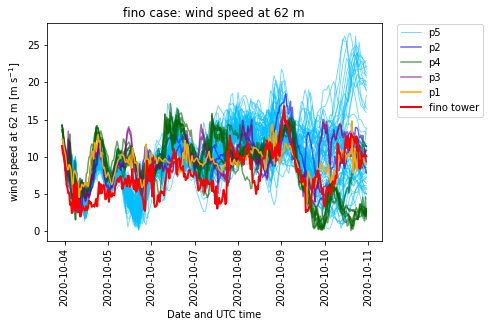

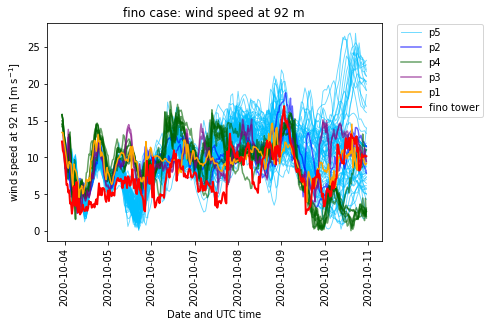

In [393]:
case = 'fino'

df_p2 = read_ts_df(case, 'p2')
df_p4 = read_ts_df(case, 'p4')
df_p3 = read_ts_df(case, 'p3')
df_p1 = read_ts_df(case, 'p1')
df_p5 = read_ts_df(case, 'p5')

plot_eu_ws_ts(62, case)
# plot_eu_ws_ts(72, case)
# plot_eu_ws_ts(82, case)
plot_eu_ws_ts(92, case)

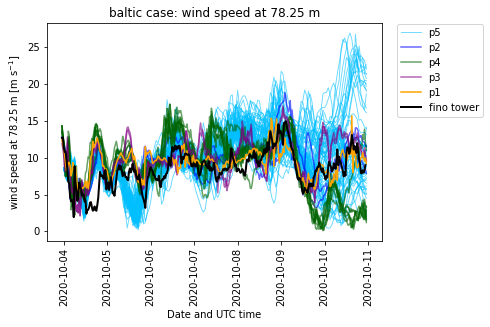

In [74]:
case = 'baltic'

df_p2 = read_ts_df(case, 'p2')
df_p4 = read_ts_df(case, 'p4')
df_p3 = read_ts_df(case, 'p3')
df_p1 = read_ts_df(case, 'p1')
df_p5 = read_ts_df(case, 'p5')

plot_eu_ws_ts(78.25, case)

## Ensemble

In [5]:
def get_summary_df(case, org):

    df = read_ts_df(case, org)
    df.drop(columns=case+'_ws', level=2, inplace=True)
    df.columns = df.columns.droplevel(2)

    iterables = [df.columns.levels[0], ['mean', 'median', 'std', 'min', 'max']]

    df_sum = pd.DataFrame(columns=pd.MultiIndex.from_product(iterables))

    for hgt in df.columns.levels[0]: 

        df_sum[hgt, 'mean'] = df[hgt].mean(axis=1)
        df_sum[hgt, 'median'] = df[hgt].median(axis=1)
        df_sum[hgt, 'std'] = df[hgt].std(axis=1)
        df_sum[hgt, 'min'] = df[hgt].min(axis=1)
        df_sum[hgt, 'max'] = df[hgt].max(axis=1)
        
    return df_sum

lev = 62

case = 'fino'

df_p5_sum = get_summary_df(case, 'p5')
df_p4_sum = get_summary_df(case, 'p4')
df_p3_sum = get_summary_df(case, 'p3')
df_p2_sum = get_summary_df(case, 'p2')

df_p1 = read_ts_df(case, 'p1')
    
lev = str(lev)

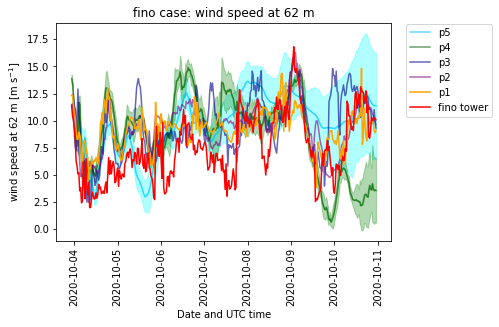

In [394]:
al_pha = 0.6

colormap = plt.cm.gist_ncar

fig, ax = plt.subplots()

ax.plot(df_p5_sum.index, df_p5_sum[lev]['mean'], c='deepskyblue', label='p5', alpha=al_pha)
ax.fill_between(df_p5_sum.index, df_p5_sum[lev]['mean'], 
                df_p5_sum[lev]['mean']+df_p5_sum[lev]['std'], color='cyan', 
                label='_nolegend_', alpha=al_pha-0.3)
ax.fill_between(df_p5_sum.index, df_p5_sum[lev]['mean'], 
                df_p5_sum[lev]['mean']-df_p5_sum[lev]['std'], color='cyan', 
                label='_nolegend_', alpha=al_pha-0.3)

ax.plot(df_p4_sum.index, df_p4_sum[lev]['mean'], c='darkgreen', label='p4', alpha=al_pha)
ax.fill_between(df_p4_sum.index, df_p4_sum[lev]['mean'], 
                df_p4_sum[lev]['mean']+df_p4_sum[lev]['std'], color='green', 
                label='_nolegend_', alpha=al_pha-0.3)
ax.fill_between(df_p4_sum.index, df_p4_sum[lev]['mean'], 
                df_p4_sum[lev]['mean']-df_p4_sum[lev]['std'], color='green', 
                label='_nolegend_', alpha=al_pha-0.3)

ax.plot(df_p3_sum.index, df_p3_sum[lev]['mean'], c='darkblue', label='p3', alpha=al_pha)

ax.plot(df_p2_sum.index, df_p2_sum[lev]['mean'], c='purple', label='p2', alpha=al_pha)

ax.plot(df_p1.index, df_p1[lev]['p1']['p1_ws'], label='p1', c='orange')

ax.plot(df_p1.index, df_p1[lev]['p1'][case+'_ws'], label='fino tower', c='r', linewidth=1.5)

var_txt = 'wind speed at '+lev+' m'

plt.xticks(rotation=90)
plt.xlabel('Date and UTC time')
plt.ylabel(var_txt+r' [m s$^{-1}$]')
plt.title(case+' case: '+var_txt)
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()

### Statistics

In [7]:
def get_hit_pct(df):

    df_c = df.copy(deep=True)

    for index, row in df.iterrows():

        org_cols = list(df.columns.drop([case, 'hit']))

        row_min = np.min(row.loc[org_cols])
        row_max = np.max(row.loc[org_cols])

        if (row[case] >= row_min) and (row[case] <= row_max):
            df_c.loc[index, 'hit'] = 1

    return 100*df_c['hit'].sum()/len(df_c)

def get_rmse(df):
    
    rmse_list = []
    
    for org in list(df.columns.drop([case, 'hit'])): 

        rmse_list.append(rmse.compute(df[case], df[org]))

    return np.mean(rmse_list)

#### All orgs

In [80]:
org_mean_df = pd.DataFrame()

org_mean_df['p3'] = df_p3_sum[lev]['mean']
org_mean_df['p2'] = df_p2_sum[lev]['mean']
org_mean_df['p4'] = df_p4_sum[lev]['mean']
org_mean_df['p1'] = df_p1[lev]['p1']['p1_ws']
org_mean_df['p5'] = df_p5_sum[lev]['mean']
org_mean_df[case] = df_p1[lev]['p1'][case+'_ws']

org_mean_df['hit'] = 0

org_mean_df.dropna(inplace=True)

org_median_df = pd.DataFrame()

org_median_df['p3'] = df_p3_sum[lev]['median']
org_median_df['p2'] = df_p2_sum[lev]['median']
org_median_df['p4'] = df_p4_sum[lev]['median']
org_median_df['p1'] = df_p1[lev]['p1']['p1_ws']
org_median_df['p5'] = df_p5_sum[lev]['median']
org_median_df[case] = df_p1[lev]['p1'][case+'_ws']

org_median_df.dropna(inplace=True)

In [22]:
def cal_orgs_stat(stat, org_mean_df=org_mean_df):
    
    if stat == 'hit_pct': 
        stat_fn = get_hit_pct
        y_txt = 'hit percentage [%]'

    elif stat == 'rmse': 
        stat_fn = get_rmse
        y_txt = r'mean rmse [m s$^{-1}$]'

    for day in org_mean_df.index.day.unique():

        day_df = org_mean_df.loc[org_mean_df.index.day == day]

        org_cols = list(day_df.columns.drop([case, 'hit']))

        org_day_df = day_df[day_df.columns.intersection(org_cols)]

        # start from 2 forecasts
        for i in range(2, len(org_day_df.columns)+1): 

            iter_cols = list(itertools.combinations(org_day_df.columns, i))

            if i == 2:
                iter_length = len(iter_cols)
            else:
                if iter_length < len(iter_cols):
                    iter_length = len(iter_cols)

        out_arr = np.zeros((int(len(org_day_df.columns)-1), int(iter_length))) * np.nan

        # start from 2 forecasts
        for i in range(2, len(org_day_df.columns)+1): 

            iter_cols = list(itertools.combinations(org_day_df.columns, i))

            for j, col in enumerate(iter_cols):

                sub_df = day_df[list(col) + [case, 'hit']]
                
                out_arr[i-2, j] = stat_fn(sub_df)

        hp_df = pd.DataFrame(out_arr.T, columns=np.arange(2, len(org_day_df.columns)+1).astype(str))

        fig, ax = plt.subplots()

        sns.swarmplot(data=hp_df, ax=ax)
        ax.set_xlabel('forecast number')
        
        ax.set_ylabel(y_txt)
            
        ax.set_title(day_df.index[0].strftime('%Y-%m-%d')+' all 5 orgs')

        plt.show()

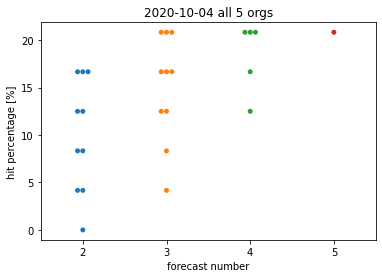

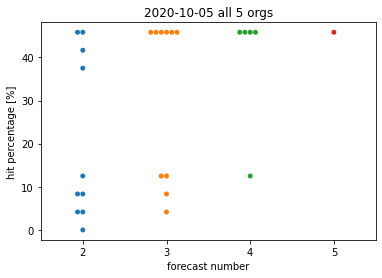

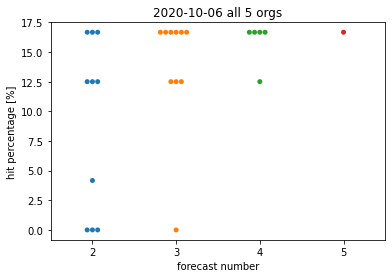

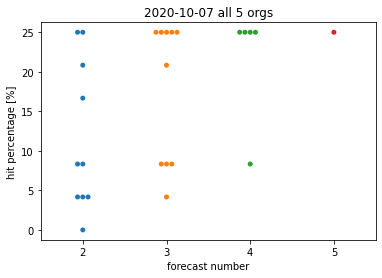

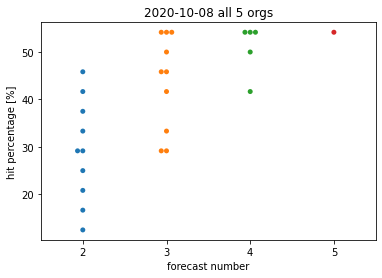

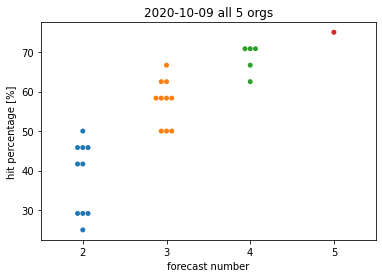

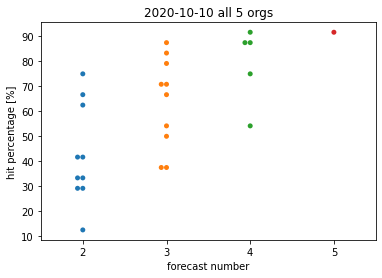

In [23]:
cal_orgs_stat('hit_pct')

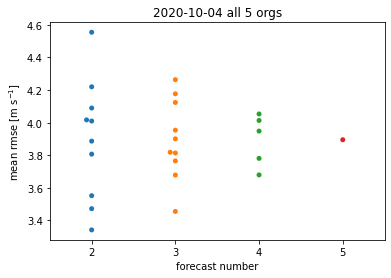

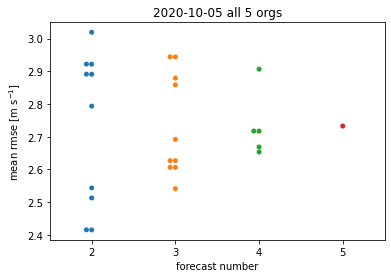

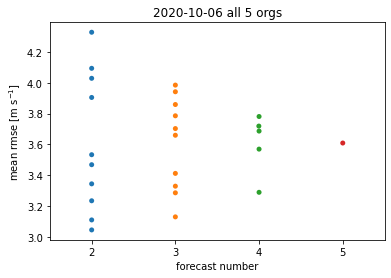

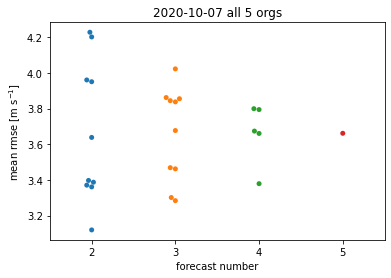

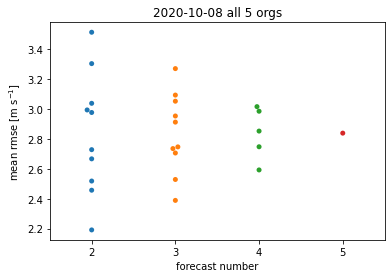

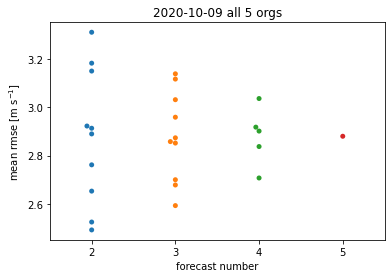

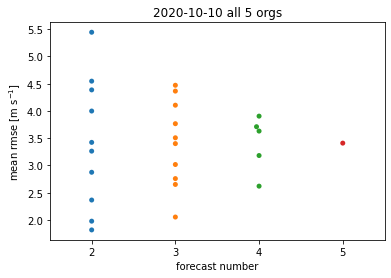

In [25]:
cal_orgs_stat('rmse')

#### Is the average of all better?

In [9]:
org_base_df = org_mean_df.drop(columns='hit')

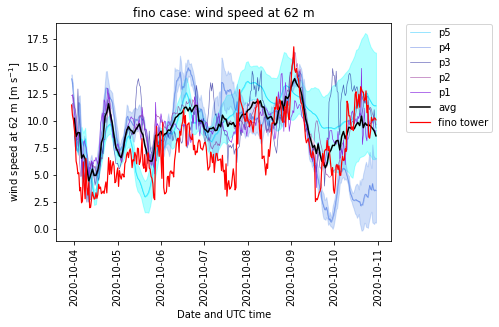

In [10]:
al_pha = 0.6

colormap = plt.cm.gist_ncar

fig, ax = plt.subplots()

mem_lw = 0.65

ax.plot(df_p5_sum.index, df_p5_sum[lev]['mean'], c='deepskyblue', label='p5', alpha=al_pha, linewidth=mem_lw)
ax.fill_between(df_p5_sum.index, df_p5_sum[lev]['mean'], 
                df_p5_sum[lev]['mean']+df_p5_sum[lev]['std'], color='cyan', 
                label='_nolegend_', alpha=al_pha-0.3)
ax.fill_between(df_p5_sum.index, df_p5_sum[lev]['mean'], 
                df_p5_sum[lev]['mean']-df_p5_sum[lev]['std'], color='cyan', 
                label='_nolegend_', alpha=al_pha-0.3)

ax.plot(df_p4_sum.index, df_p4_sum[lev]['mean'], c='royalblue', label='p4', alpha=al_pha, linewidth=mem_lw)
ax.fill_between(df_p4_sum.index, df_p4_sum[lev]['mean'], 
                df_p4_sum[lev]['mean']+df_p4_sum[lev]['std'], color='cornflowerblue', 
                label='_nolegend_', alpha=al_pha-0.3)
ax.fill_between(df_p4_sum.index, df_p4_sum[lev]['mean'], 
                df_p4_sum[lev]['mean']-df_p4_sum[lev]['std'], color='cornflowerblue', 
                label='_nolegend_', alpha=al_pha-0.3)

ax.plot(df_p3_sum.index, df_p3_sum[lev]['mean'], c='darkblue', label='p3', alpha=al_pha, linewidth=mem_lw)

ax.plot(df_p2_sum.index, df_p2_sum[lev]['mean'], c='purple', label='p2', alpha=al_pha, linewidth=mem_lw)

ax.plot(df_p1.index, df_p1[lev]['p1']['p1_ws'], label='p1', c='blueviolet', linewidth=mem_lw)

ax.plot(org_base_df.index, org_base_df.drop(columns=case).mean(axis=1), label='avg', c='k', linewidth=1.5)

ax.plot(df_p1.index, df_p1[lev]['p1'][case+'_ws'], label='fino tower', c='red', linewidth=1.2)

var_txt = 'wind speed at '+lev+' m'

plt.xticks(rotation=90)
plt.xlabel('Date and UTC time')
plt.ylabel(var_txt+r' [m s$^{-1}$]')
plt.title(case+' case: '+var_txt)
plt.legend(bbox_to_anchor=(1.03, 1.02), loc='upper left')
plt.show()

In [107]:
org_ae_df = pd.DataFrame()

for col in org_base_df.drop(columns=case):
    
    org_ae_df[col] = abs(org_base_df[col] - org_base_df[case])

org_ae_df['avg'] = abs(org_base_df.drop(columns=case).mean(axis=1) - org_base_df[case])

org_median_ae_df = pd.DataFrame()

for col in org_median_df.drop(columns=case):
    
    org_median_ae_df[col] = abs(org_median_df[col] - org_median_df[case])
    
# derive similar results anyway
# org_median_ae_df['median'] = abs(org_median_df.drop(columns=case).mean(axis=1) - org_median_df[case])

org_median_ae_df['median'] = abs(org_median_df.drop(columns=case).median(axis=1) - org_median_df[case])

<AxesSubplot:xlabel='t'>

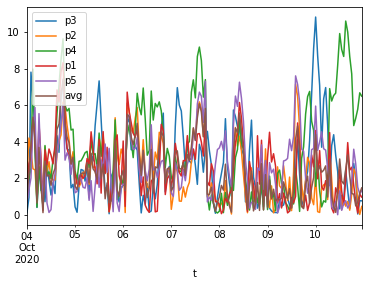

In [12]:
org_ae_df.plot()

In [319]:
def plot_ae_t_scatter(ae_df, var, legend=True):

    fig, ax = plt.subplots(figsize=(10, 5))

    for col in ae_df.columns.drop([var]):
        plt.scatter(ae_df.index, ae_df[col], alpha=0.3, label=col)

    plt.scatter(ae_df.index, ae_df[var], c='k', alpha=0.5, label=var)

    plt.ylabel(r'absolute error [m s$^{-1}$]')
    
    if legend is True:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        plt.legend('')

    plt.show()

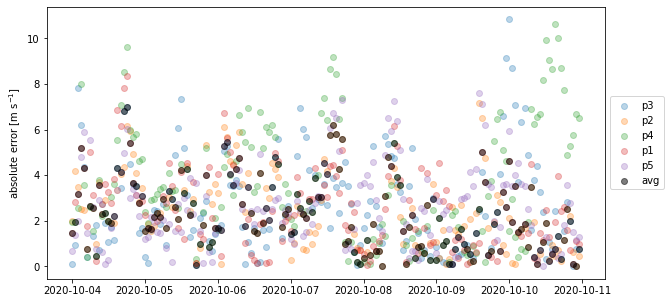

In [320]:
plot_ae_t_scatter(org_ae_df, 'avg')

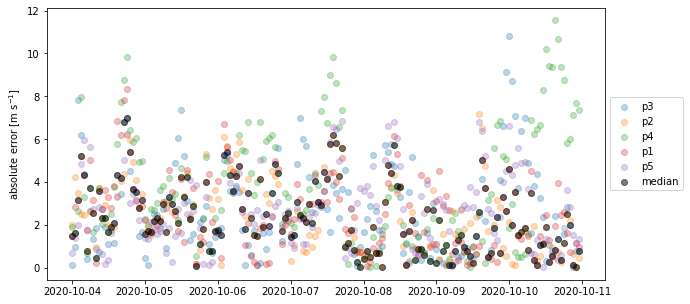

In [321]:
plot_ae_t_scatter(org_median_ae_df, 'median')

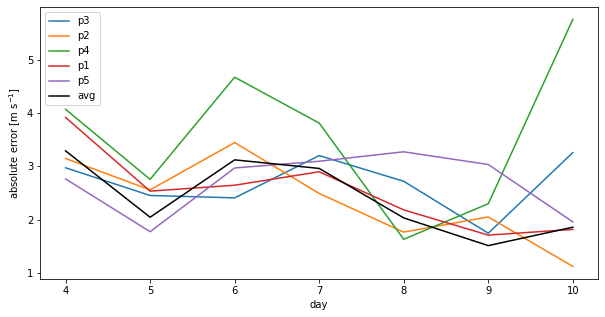

In [79]:
# use mean of ensemble means vs median of ensemble means yield similar results

org_ae_daymean_df = org_ae_df.groupby(org_ae_df.index.day).mean()

fig, ax = plt.subplots(figsize=(10, 5))

plt.gca().set_prop_cycle(None)

for col in org_ae_daymean_df.drop(columns='avg'): 
    
    plt.plot(org_ae_daymean_df.index, org_ae_daymean_df[col], label=col)
    
plt.plot(org_ae_daymean_df['avg'], c='k', label='avg')
    
plt.xlabel('day')
plt.ylabel(r'absolute error [m s$^{-1}$]')
plt.legend()
    
plt.show()

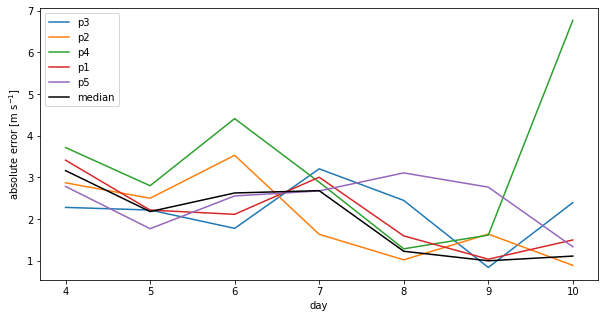

In [106]:
# median of ensemble medians are close to a certain member median because of the stat nature of median

org_ae_daymedian_df = org_median_ae_df.groupby(org_median_ae_df.index.day).median()

fig, ax = plt.subplots(figsize=(10, 5))

plt.gca().set_prop_cycle(None)

for col in org_ae_daymedian_df.drop(columns='median'): 
    
    plt.plot(org_ae_daymedian_df.index, org_ae_daymedian_df[col], label=col)
    
plt.plot(org_ae_daymedian_df['median'], c='k', label='median')
    
plt.xlabel('day')
plt.ylabel(r'absolute error [m s$^{-1}$]')
plt.legend()
    
plt.show()

In [98]:
org_rankae_df = pd.DataFrame(columns=org_ae_df.columns)

for index, row in org_ae_df.iterrows():
    
    org_rankae_df.loc[index] = row.rank()
    
org_median_rankae_df = pd.DataFrame(columns=org_median_ae_df.columns)

for index, row in org_median_ae_df.iterrows():
    
    org_median_rankae_df.loc[index] = row.rank()

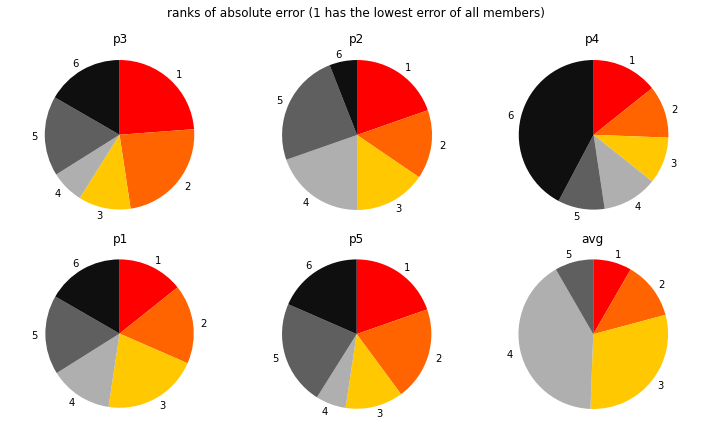

In [286]:
rankae_df = org_rankae_df

fig, ax = plt.subplots(2, 3, figsize=(10, 6))

unique_n = rankae_df.nunique().max()

color_n = math.ceil(unique_n/2)
gray_n = unique_n-color_n

colors = plt.get_cmap('autumn')(np.arange(color_n)*100)

grays = plt.get_cmap('gray_r')(np.arange(1, gray_n+1)*80)

ax = ax.ravel()

for ind, org in enumerate(rankae_df.columns): 

    ranks_list = sorted(rankae_df[org].unique().astype(int))

    rank_sum_list = []

    for r in ranks_list: 

        rank_sum_list.append((rankae_df[org] == r).sum())

    ax[ind].pie(rank_sum_list, labels=ranks_list, shadow=False, startangle=90, counterclock=False, 
                colors=np.concatenate((colors, grays)))

    ax[ind].axis('equal')

    ax[ind].set_title(org, pad=10)

plt.suptitle('ranks of absolute error (1 has the lowest error of all members)')
plt.tight_layout()
plt.show()

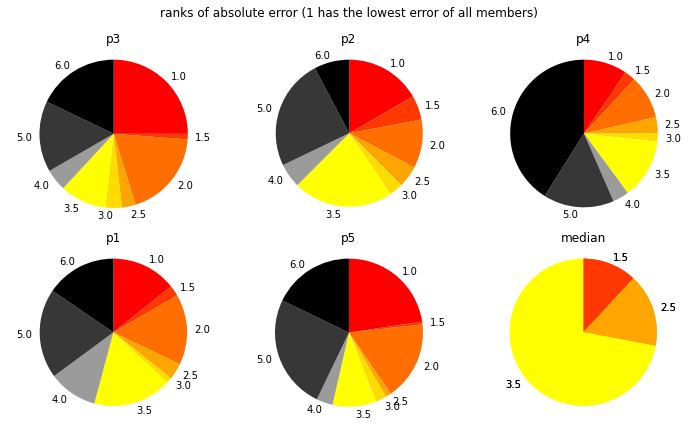

In [383]:
rankae_df = org_median_rankae_df

fig, ax = plt.subplots(2, 3, figsize=(10, 6))

unique_n = rankae_df.nunique().max()

color_n = math.ceil(unique_n/2)
gray_n = unique_n-color_n

autumns = plt.get_cmap('autumn')(np.arange(color_n+1)*55)

grays = plt.get_cmap('gray_r')(np.arange(1, gray_n)*100)

ax = ax.ravel()

for ind, org in enumerate(rankae_df.columns): 

    ranks_list = sorted(rankae_df[org].unique())

    rank_sum_list = []

    for r in ranks_list: 

        rank_sum_list.append((rankae_df[org] == r).sum())

    if org == 'median':
        cmap = autumns[[1, 3, 5]]
    else:
        cmap = np.concatenate((autumns, grays))
        
    ax[ind].pie(rank_sum_list, labels=ranks_list, shadow=False, startangle=90, counterclock=False, 
                colors=cmap)
    
    if org == 'median':
        ax[ind].pie(rank_sum_list, labels=ranks_list, shadow=False, startangle=90, counterclock=False, 
                colors=cmap)

    ax[ind].axis('equal')

    ax[ind].set_title(org, pad=10)

plt.suptitle('ranks of absolute error (1 has the lowest error of all members)')
plt.tight_layout()
plt.show()

In [395]:
def plot_rankae_t_scatter(rankae_df, var, legend=True):
    
    fig, ax = plt.subplots(figsize=(10, 5))

    for col in rankae_df.columns.drop([var]):
        plt.scatter(rankae_df.index, rankae_df[col], alpha=0.3, label=col)

    plt.scatter(rankae_df.index, rankae_df[var], c='k', alpha=0.5, label=var)

    plt.ylabel('absolute error rank (1 has the lowest error of all members)')
    
    if legend is True:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        plt.legend('')

    plt.show()

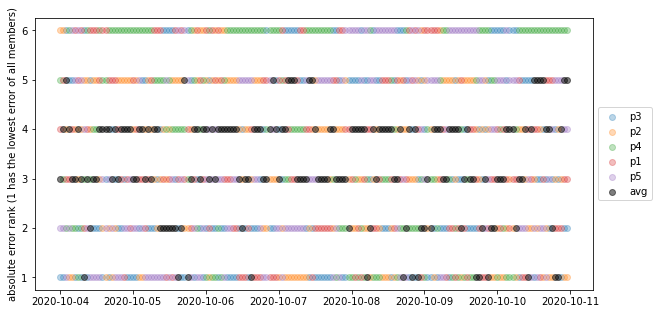

In [324]:
plot_rankae_t_scatter(org_rankae_df, 'avg')

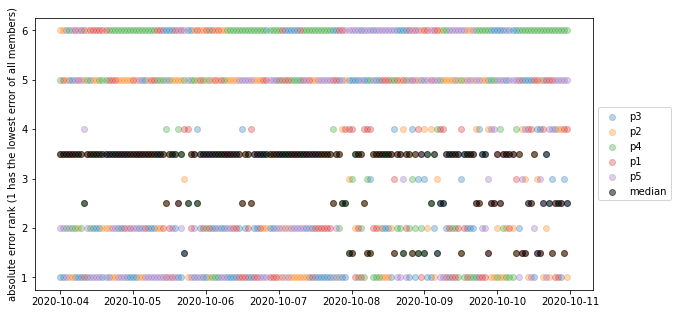

In [396]:
plot_rankae_t_scatter(org_median_rankae_df, 'median')

In [25]:
org_aegt2_df = org_ae_df[(org_ae_df > 2).all(1)]

time_diff_arr = (org_aegt2_df.index[1:] - org_aegt2_df.index[:-1]) == timedelta(hours=1)

start_ind = (np.where(~time_diff_arr)[0]+1).tolist()

startend_df = pd.DataFrame(columns=['start', 'end'])

startend_df = startend_df.append(pd.DataFrame.from_dict({'start': [org_aegt2_df.index[0]], 
                                           'end': [org_aegt2_df.index[start_ind[0]-1]]}))

for ind, pos in enumerate(start_ind[:-1]): 
    
    if start_ind[ind+1] - pos == 1:
        
        dic = {'start': [org_aegt2_df.index[pos]], 'end': [org_aegt2_df.index[pos]]}
    else:
        dic = {'start': [org_aegt2_df.index[pos]], 'end': [org_aegt2_df.index[start_ind[ind+1]-1]]}
        
    startend_df = startend_df.append(pd.DataFrame.from_dict(dic))
    
startend_df = startend_df.append(pd.DataFrame.from_dict({'start': [org_aegt2_df.index[start_ind[-1]]], 
                                           'end': [org_aegt2_df.index[-1]]}))

startend_df = startend_df.reset_index().drop(columns='index')

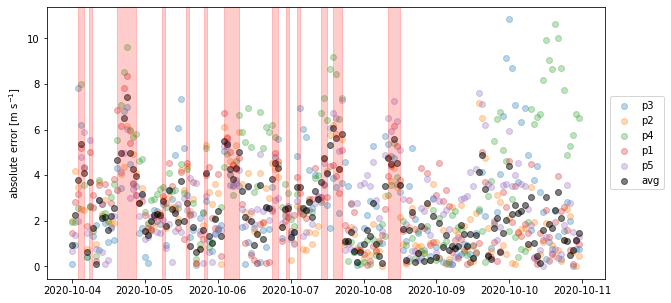

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))

for col in org_ae_df.columns.drop(['avg']):
    plt.scatter(org_ae_df.index, org_ae_df[col], alpha=0.3, label=col)
    
plt.scatter(org_ae_df.index, org_ae_df['avg'], c='k', alpha=0.5, label='avg')

plt.ylabel(r'absolute error [m s$^{-1}$]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

y_min, y_max = 0, 100

for i, row in startend_df.iterrows():
    
    p_start, p_end = row['start'], row['end']
    
    if p_start == p_end:
        p_start = p_start - timedelta(minutes=30)
        p_end = p_end + timedelta(minutes=30)
        
    plt.axvspan(p_start, p_end, y_min, y_max,
                color='red', alpha=0.2)

plt.show()

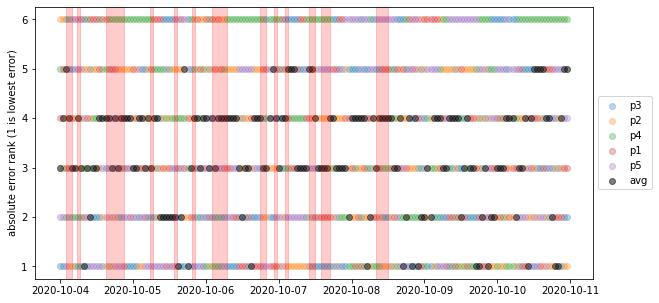

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))

for col in org_rankae_df.columns.drop(['avg']):
    plt.scatter(org_rankae_df.index, org_rankae_df[col], alpha=0.3, label=col)
    
plt.scatter(org_rankae_df.index, org_rankae_df['avg'], c='k', alpha=0.5, label='avg')

plt.ylabel('absolute error rank (1 is lowest error)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

y_min, y_max = 0, 100

for i, row in startend_df.iterrows():
    
    p_start, p_end = row['start'], row['end']
    
    if p_start == p_end:
        p_start = p_start - timedelta(minutes=30)
        p_end = p_end + timedelta(minutes=30)
        
    plt.axvspan(p_start, p_end, y_min, y_max,
                color='red', alpha=0.2)
    
plt.show()

#### p4

In [24]:
def get_1org_stat(org, stat):

    in_df = read_ts_df(case, org)

    lev_df = pd.DataFrame()

    for member in in_df[lev].columns.get_level_values(0).unique(): 

        lev_df[member] = in_df[lev][member][member+'_ws']

    lev_df[case] = in_df[lev][member][case+'_ws']

    lev_df['hit'] = 0

    lev_df.dropna(inplace=True)

    for day in lev_df.index.day.unique():

        day_df = lev_df.loc[lev_df.index.day == day]

        org_cols = list(day_df.columns.drop([case, 'hit']))

        org_day_df = day_df[day_df.columns.intersection(org_cols)]

        # start from 2 forecasts
        for i in range(2, len(org_day_df.columns)+1): 

            iter_cols = list(itertools.combinations(org_day_df.columns, i))

            if i == 2:
                iter_length = len(iter_cols)
            else:
                if iter_length < len(iter_cols):
                    iter_length = len(iter_cols)

        hit_pct_arr = np.zeros((int(len(org_day_df.columns)-1), int(iter_length))) * np.nan

        # start from 2 forecasts
        for i in range(2, len(org_day_df.columns)+1): 

            iter_cols = list(itertools.combinations(org_day_df.columns, i))

            for j, col in enumerate(iter_cols):

                sub_df = day_df[list(col) + [case, 'hit']]

                if stat == 'hit_pct': 
                    hit_pct_arr[i-2, j] = get_hit_pct(sub_df)
                    
                if stat == 'rmse': 
                    hit_pct_arr[i-2, j] = get_rmse(sub_df)

        hp_df = pd.DataFrame(hit_pct_arr.T, columns=np.arange(2, len(org_day_df.columns)+1).astype(str))

        fig, ax = plt.subplots()

        sns.stripplot(data=hp_df, ax=ax)
        ax.set_xlabel('forecast number')
        
        if stat == 'hit_pct': 
            ax.set_ylabel('hit percentage [%]')
            
        if stat == 'rmse':
            ax.set_ylabel(r'rmse [m s$^{-1}$]')
            
        ax.set_title(day_df.index[0].strftime('%Y-%m-%d')+' '+org)

        plt.show()

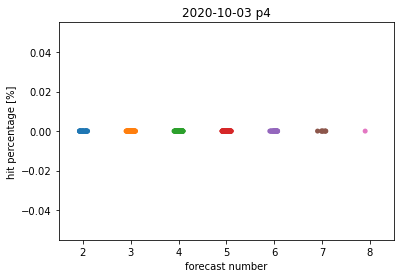

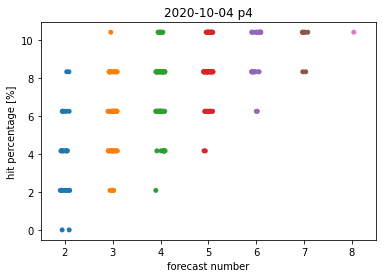

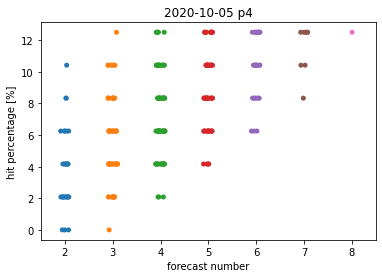

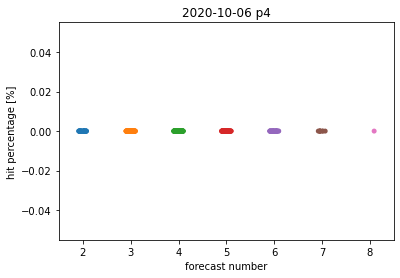

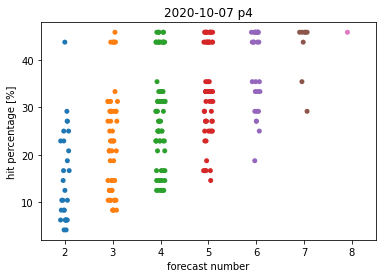

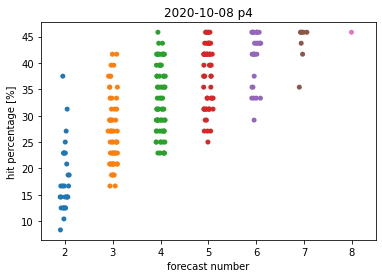

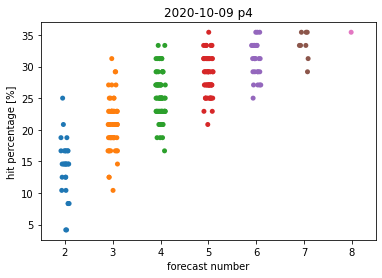

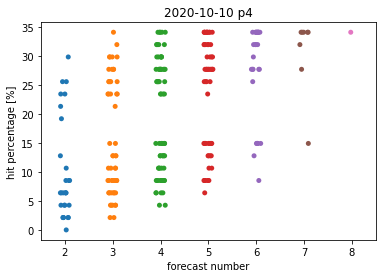

In [25]:
get_1org_stat('p4', 'hit_pct')

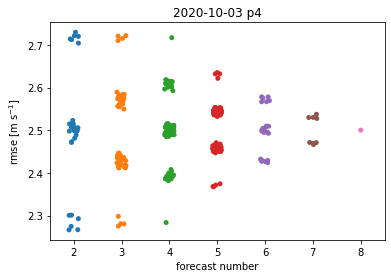

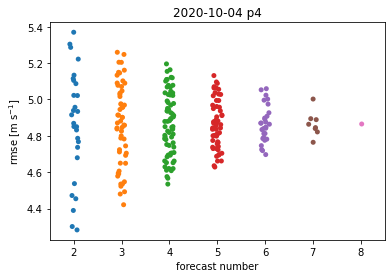

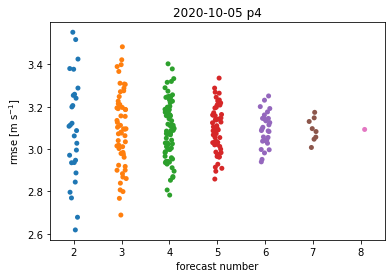

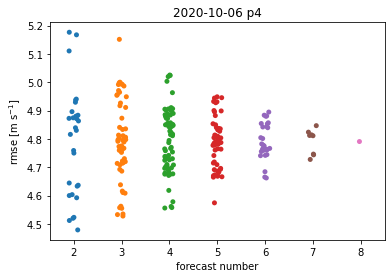

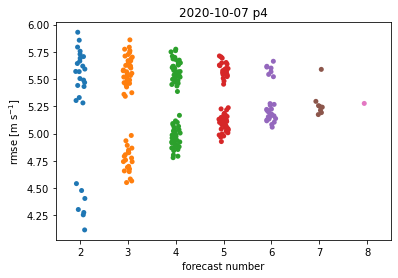

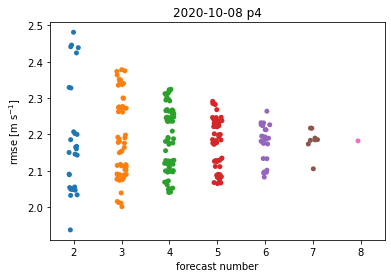

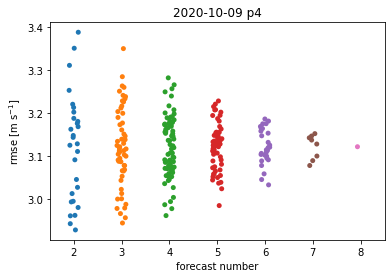

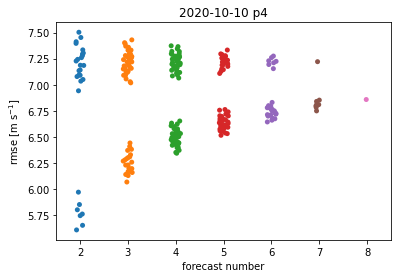

In [26]:
get_1org_stat('p4', 'rmse')

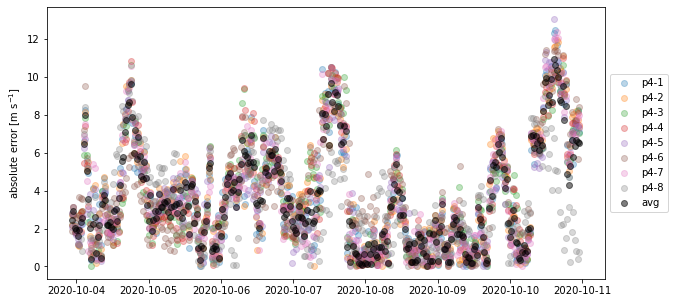

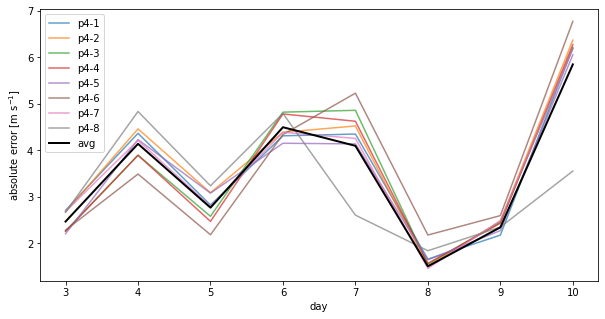

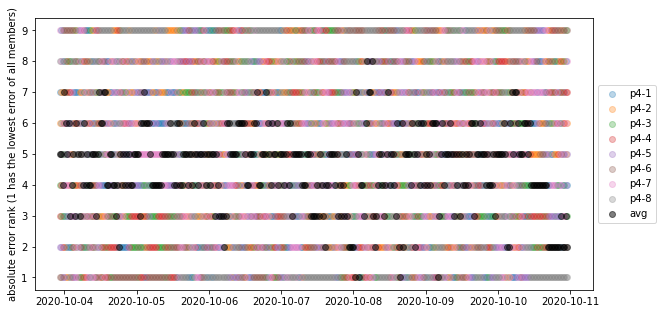

In [390]:
case = 'fino'
lev = str(62)
org = 'p4'

in_df = read_ts_df(case, org)

lev_df = pd.DataFrame()

for member in in_df[lev].columns.get_level_values(0).unique(): 

    lev_df[member] = in_df[lev][member][member+'_ws']

lev_df[case] = in_df[lev][member][case+'_ws']

lev_df.dropna(inplace=True)

p_ae_df = pd.DataFrame()

for col in lev_df.drop(columns=case):
    
    p_ae_df[col] = abs(lev_df[col] - lev_df[case])

p_ae_df['avg'] = abs(lev_df.drop(columns=case).mean(axis=1) - lev_df[case])

plot_ae_t_scatter(p_ae_df, 'avg')

p_ae_daymean_df = p_ae_df.groupby(p_ae_df.index.day).mean()

fig, ax = plt.subplots(figsize=(10, 5))

plt.gca().set_prop_cycle(None)

for col in p_ae_daymean_df.drop(columns='avg'): 
    
    plt.plot(p_ae_daymean_df.index, p_ae_daymean_df[col], label=col, alpha=0.7)
    
plt.plot(p_ae_daymean_df['avg'], c='k', label='avg', linewidth=2)
    
plt.xlabel('day')
plt.ylabel(r'absolute error [m s$^{-1}$]')
plt.legend()
    
plt.show()

p_rankae_df = pd.DataFrame(columns=p_ae_df.columns)

for index, row in p_ae_df.iterrows():
    
    p_rankae_df.loc[index] = row.rank()
    
plot_rankae_t_scatter(p_rankae_df, 'avg')

#### p5

##### bootstrap rmse

In [139]:
def get_1org_bootstrap_stat(org, loop_n, stat):
    
    if stat == 'hit_pct': 
        stat_fn = get_hit_pct
        y_txt = 'hit percentage [%]'

    elif stat == 'rmse': 
        stat_fn = get_rmse
        y_txt = r'mean rmse [m s$^{-1}$]'

    in_df = read_ts_df(case, org)

    lev_df = pd.DataFrame()

    for member in in_df[lev].columns.get_level_values(0).unique(): 

        lev_df[member] = in_df[lev][member][member+'_ws']

    lev_df[case] = in_df[lev][member][case+'_ws']

    lev_df['hit'] = 0

    lev_df.dropna(inplace=True)

    for day in lev_df.index.day.unique():

        day_df = lev_df.loc[lev_df.index.day == day]

        org_cols = list(day_df.columns.drop([case, 'hit']))

        org_day_df = day_df[day_df.columns.intersection(org_cols)]

        out_arr = np.zeros((int(len(org_day_df.columns)-1), loop_n)) * np.nan

        # start from 2 forecasts
        for i in range(2, len(org_day_df.columns)): 

            for j in range(loop_n):

                col = resample(org_day_df.T, replace=False, n_samples=i).T.columns

                sub_df = day_df[list(col) + [case, 'hit']]

                out_arr[i-2, j] = stat_fn(sub_df)

        out_arr[-1, 0] = stat_fn(day_df)

        hp_df = pd.DataFrame(out_arr.T, columns=np.arange(2, len(org_day_df.columns)+1).astype(str))

        fig, ax = plt.subplots(figsize=(10, 5))

        sns.stripplot(data=hp_df, ax=ax)
        ax.set_xlabel('forecast number')
        ax.set_ylabel(y_txt)
        ax.set_title(day_df.index[0].strftime('%Y-%m-%d')+' '+org)

        myLocator = mticker.MultipleLocator(5)
        ax.xaxis.set_major_locator(myLocator)

        plt.show()

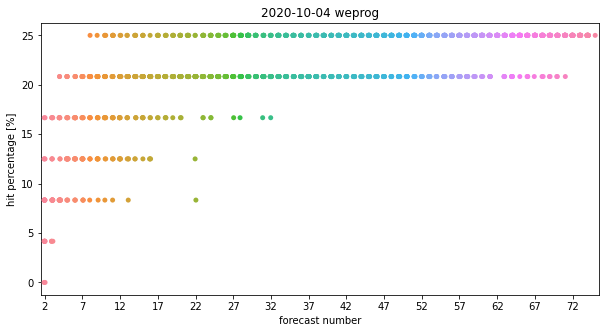

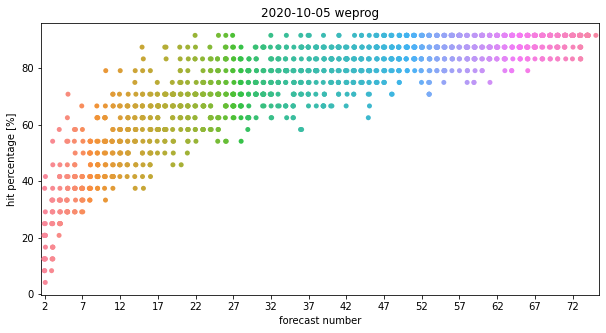

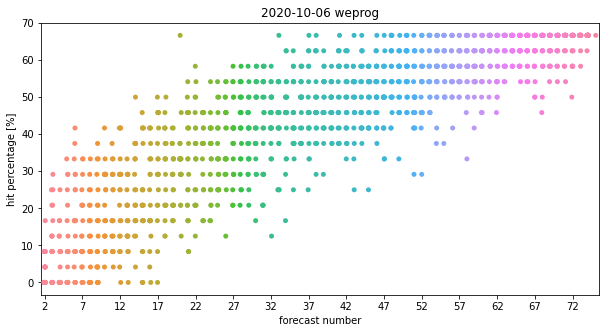

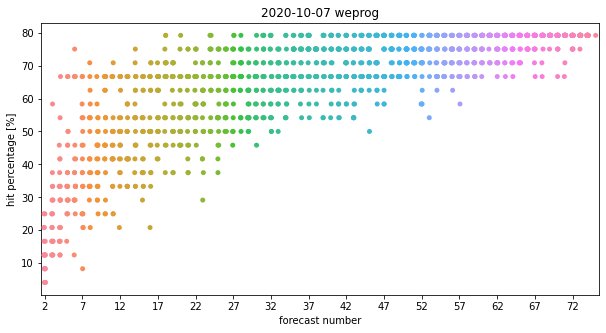

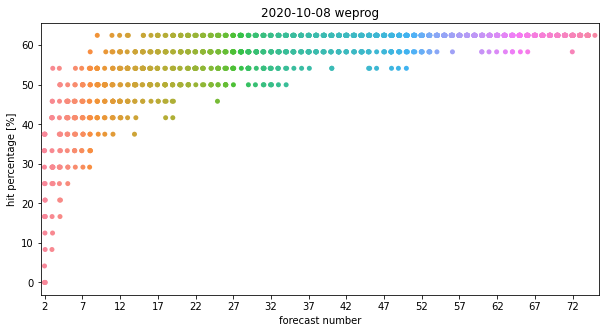

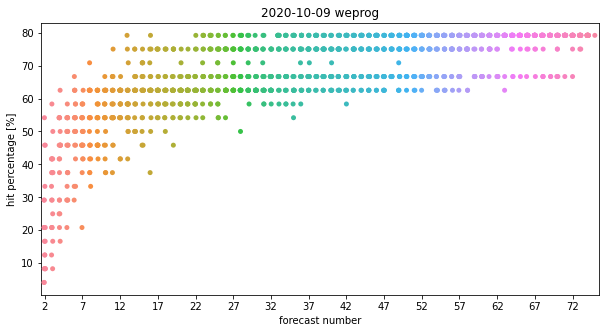

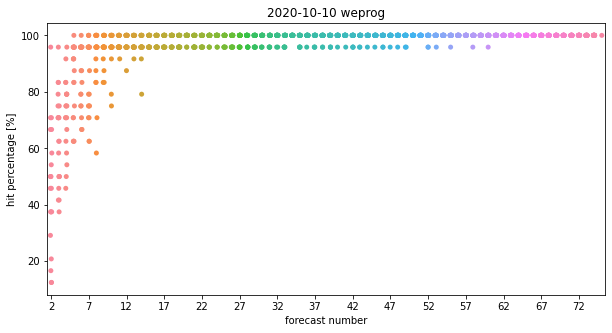

In [128]:
loop_n = 20

get_1org_bootstrap_stat('p5', loop_n, 'hit_pct')

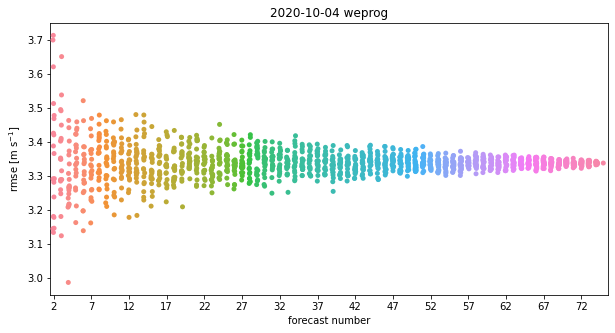

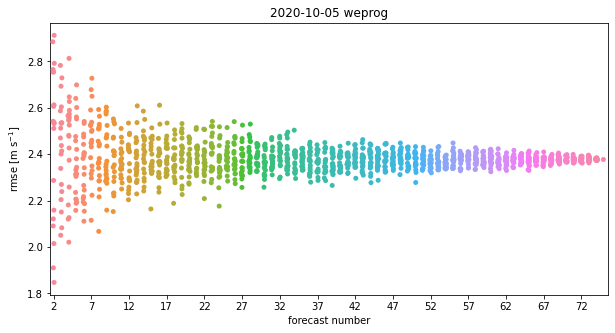

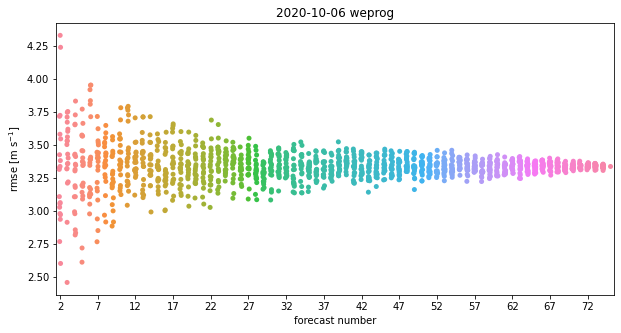

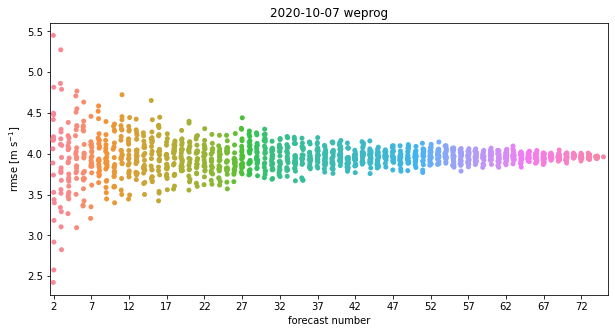

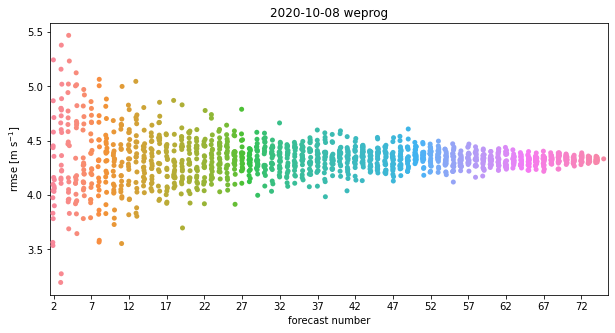

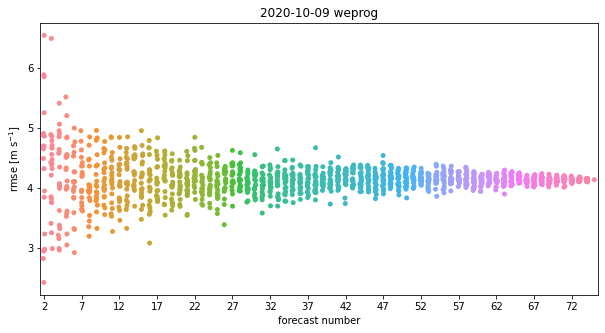

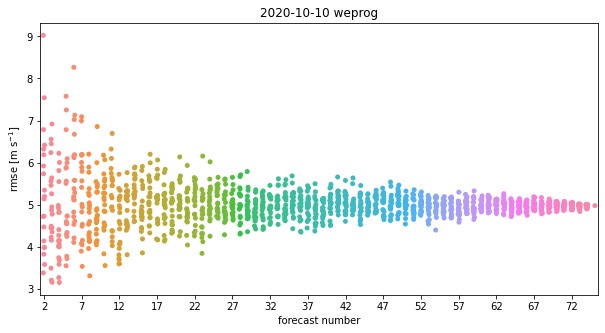

In [141]:
loop_n = 20

get_1org_bootstrap_stat('p5', loop_n, 'rmse')

##### bootstrap rmse & rmsd

In [401]:
def cal_rmse(df):
    
    rmse_list = []
    
    for org in list(df.columns.drop([case])): 

        rmse_list.append(rmse.compute(df[case], df[org]))

    return np.mean(rmse_list)

def cal_rmsd(df):
    
    rmsd_list = []
    
    for pair in list(itertools.combinations(df.columns.drop([case]), 2)): 

        rmsd_list.append(rmse.compute(df[pair[0]], df[pair[1]]))

    return np.mean(rmsd_list)

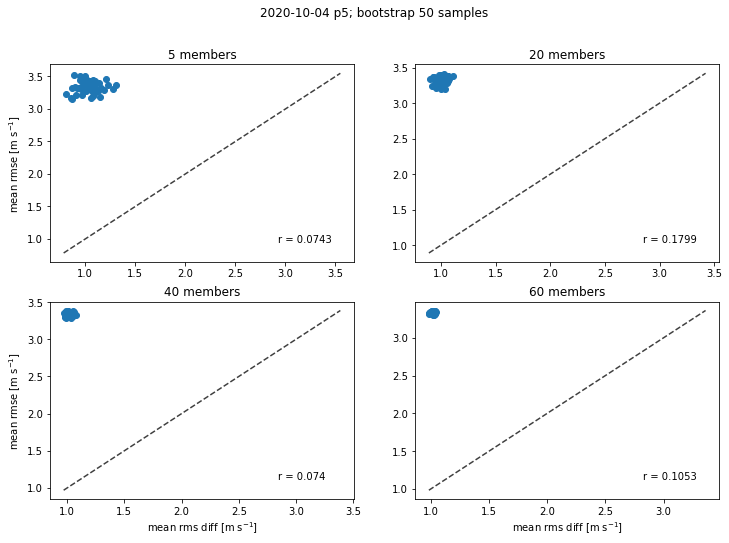

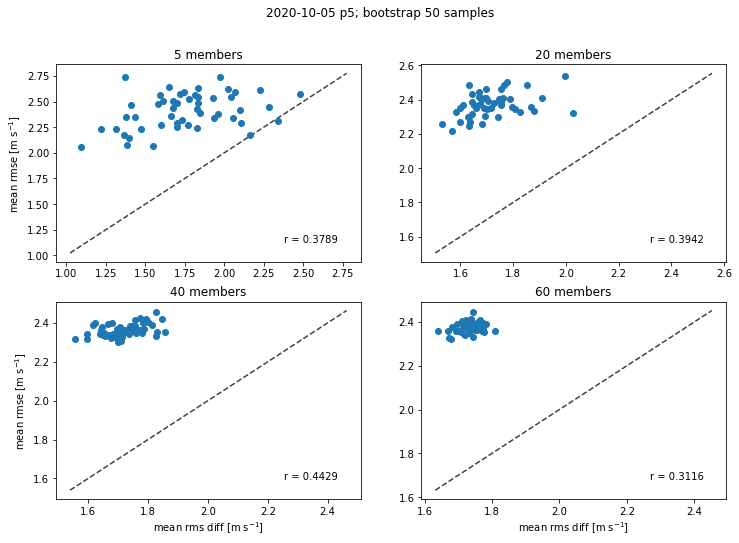

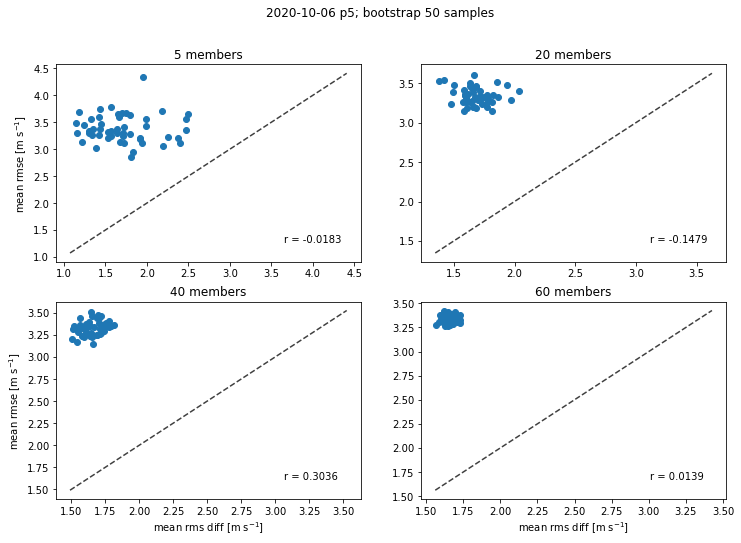

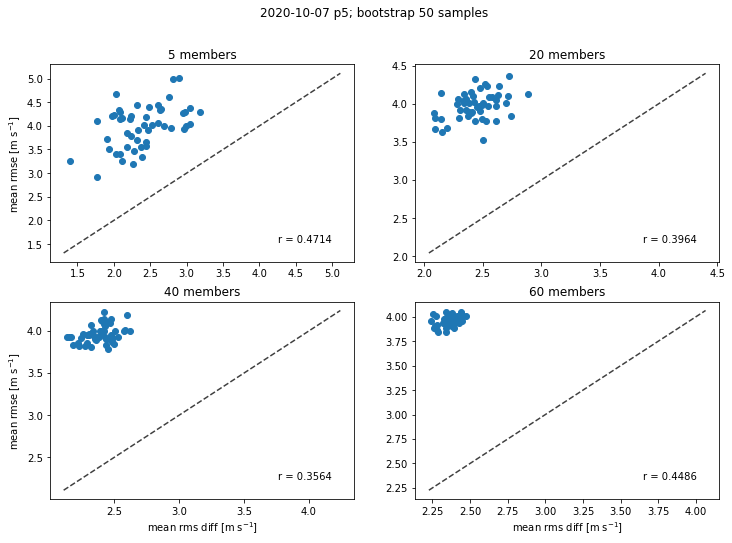

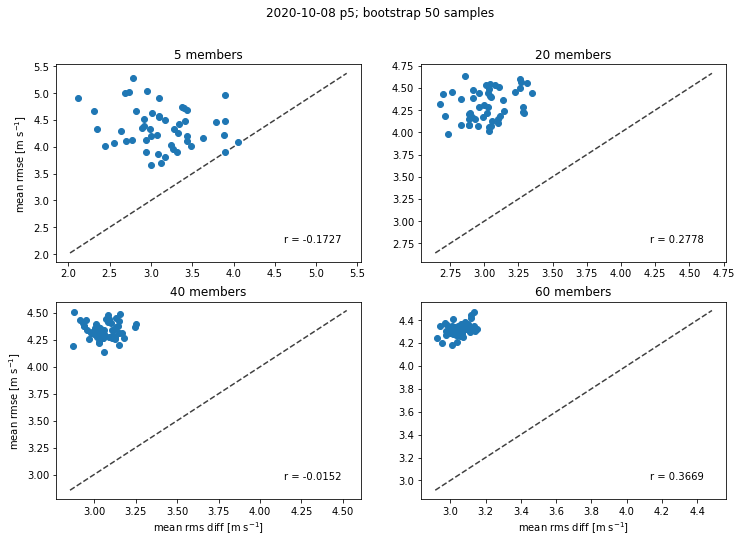

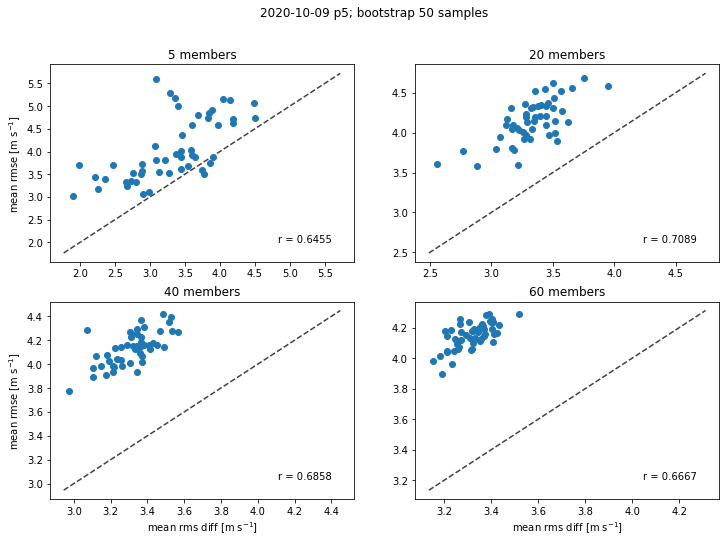

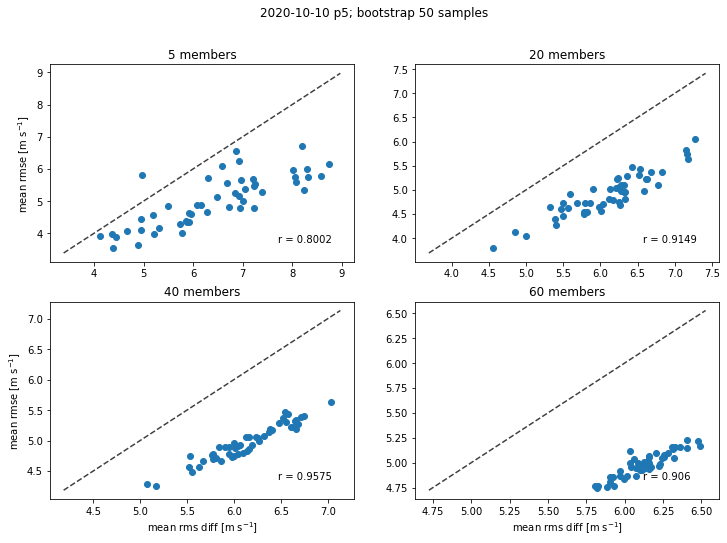

In [408]:
case = 'fino'
org = 'p5'
loop_n = 50

in_df = read_ts_df(case, org)

lev_df = pd.DataFrame()

for member in in_df[lev].columns.get_level_values(0).unique(): 

    lev_df[member] = in_df[lev][member][member+'_ws']

lev_df[case] = in_df[lev][member][case+'_ws']

# lev_df['hit'] = 0

lev_df.dropna(inplace=True)

mem_list = [5, 20, 40, 60] # select number of ensemble members

for day in lev_df.index.day.unique():

    day_df = lev_df.loc[lev_df.index.day == day]

#     org_cols = list(day_df.columns.drop([case, 'hit']))
    org_cols = list(day_df.columns.drop([case]))

    org_day_df = day_df[day_df.columns.intersection(org_cols)]

    rmse_arr = np.zeros((int(len(org_day_df.columns)-1), loop_n)) * np.nan
    rmsd_arr = np.zeros((int(len(org_day_df.columns)-1), loop_n)) * np.nan

    # start from 2 forecasts
    for i in mem_list: 

        for j in range(loop_n):

            col = resample(org_day_df.T, replace=False, n_samples=i).T.columns

#             sub_df = day_df[list(col) + [case, 'hit']]
            sub_df = day_df[list(col) + [case]]

            rmse_arr[i-2, j] = cal_rmse(sub_df)
            rmsd_arr[i-2, j] = cal_rmsd(sub_df)

#     rmse_arr[-1, 0] = get_rmse(day_df)
#     rmsd_arr[-1, 0] = get_rmsd(day_df)

    mean_rmse_df = pd.DataFrame(rmse_arr.T, columns=np.arange(2, len(org_day_df.columns)+1).astype(str))
    mean_rmsd_df = pd.DataFrame(rmsd_arr.T, columns=np.arange(2, len(org_day_df.columns)+1).astype(str))

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

    for num, ax in zip(mem_list, [ax1, ax2, ax3, ax4]):

        mem = str(num)
        ax.scatter(mean_rmsd_df[mem], mean_rmse_df[mem])
        ax.set_title(mem+' members')
        
        lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
                np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
               ]
        ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

        r = str(np.round(np.corrcoef(mean_rmse_df[mem], mean_rmsd_df[mem])[0, 1], 4))
        ax.text(0.75, 0.1, 'r = '+r, transform=ax.transAxes)

    ax1.set_ylabel(r'mean rmse [m s$^{-1}$]')
    ax3.set_ylabel(r'mean rmse [m s$^{-1}$]')

    ax3.set_xlabel(r'mean rms diff [m s$^{-1}$]')
    ax4.set_xlabel(r'mean rms diff [m s$^{-1}$]')

    plt.suptitle(day_df.index[0].strftime('%Y-%m-%d')+' '+org+'; bootstrap '+str(loop_n)+' samples')

    plt.show()

In [63]:
case = 'fino'
org = 'p5'
loop_n = 30

in_df = read_ts_df(case, org)

lev_df = pd.DataFrame()

for member in in_df[lev].columns.get_level_values(0).unique(): 

    lev_df[member] = in_df[lev][member][member+'_ws']

lev_df[case] = in_df[lev][member][case+'_ws']

lev_df.dropna(inplace=True)

mem_list = [5, 10, 20, 40] # select number of ensemble members

r_df = pd.DataFrame(index=lev_df.index, columns=mem_list)

for time in lev_df.index.unique():

    print(time)

    org_cols = list(lev_df.columns.drop([case]))

    org_lev_df = lev_df[lev_df.columns.intersection(org_cols)]

    for mem in mem_list: 

        rmse_l, rmsd_l = [], []

        for j in range(loop_n):

            col = resample(org_lev_df.T, replace=False, n_samples=mem).T.columns

            sub_df = lev_df[list(col) + [case]]

            rmse_l.append(cal_rmse(sub_df))
            rmsd_l.append(cal_rmsd(sub_df))

        r = np.round(np.corrcoef(rmse_l, rmsd_l)[0, 1], 4)

        r_df.loc[r_df.index == time, mem] = r

2020-10-04 00:00:00
2020-10-04 01:00:00
2020-10-04 02:00:00
2020-10-04 03:00:00
2020-10-04 04:00:00
2020-10-04 05:00:00
2020-10-04 06:00:00
2020-10-04 07:00:00
2020-10-04 08:00:00
2020-10-04 09:00:00
2020-10-04 10:00:00
2020-10-04 11:00:00
2020-10-04 12:00:00
2020-10-04 13:00:00
2020-10-04 14:00:00
2020-10-04 15:00:00
2020-10-04 16:00:00
2020-10-04 17:00:00
2020-10-04 18:00:00
2020-10-04 19:00:00
2020-10-04 20:00:00
2020-10-04 21:00:00
2020-10-04 22:00:00
2020-10-04 23:00:00
2020-10-05 00:00:00
2020-10-05 01:00:00
2020-10-05 02:00:00
2020-10-05 03:00:00
2020-10-05 04:00:00
2020-10-05 05:00:00
2020-10-05 06:00:00
2020-10-05 07:00:00
2020-10-05 08:00:00
2020-10-05 09:00:00
2020-10-05 10:00:00
2020-10-05 11:00:00
2020-10-05 12:00:00
2020-10-05 13:00:00
2020-10-05 14:00:00
2020-10-05 15:00:00
2020-10-05 16:00:00
2020-10-05 17:00:00
2020-10-05 18:00:00
2020-10-05 19:00:00
2020-10-05 20:00:00
2020-10-05 21:00:00
2020-10-05 22:00:00
2020-10-05 23:00:00
2020-10-06 00:00:00
2020-10-06 01:00:00


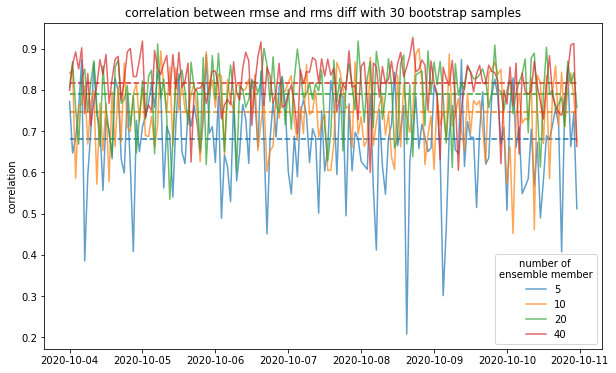

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))

for col in r_df.columns: 
    
    l_color = next(ax._get_lines.prop_cycler)['color']

    plt.plot(r_df.index, r_df[col], label=col, alpha=0.7, c=l_color)
    
    plt.hlines(r_df[col].mean(), r_df.index[0], r_df.index[-1], linestyle='--', color=l_color)

plt.ylabel('correlation')
plt.title('correlation between rmse and rms diff with '+str(loop_n)+' bootstrap samples')

l = plt.legend(title='number of \nensemble member')
plt.setp(l.get_title(), multialignment='center')

plt.show()

##### rank members

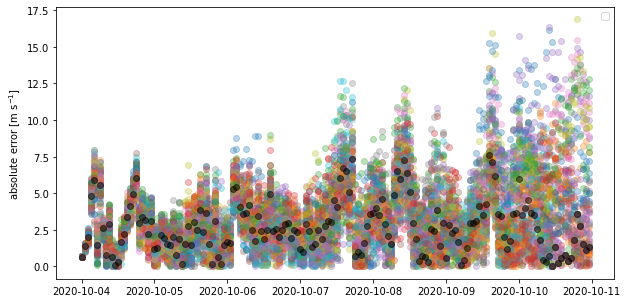

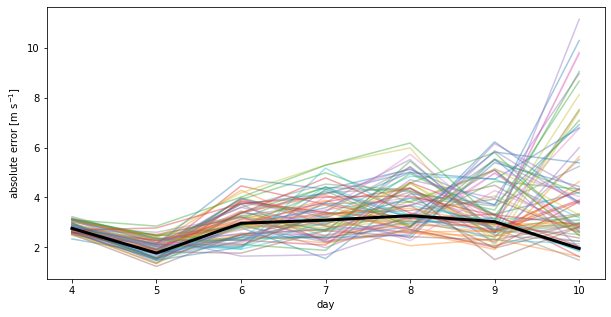

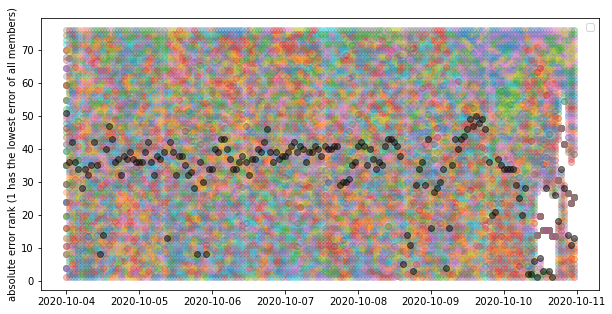

In [391]:
case = 'fino'
lev = str(62)
org = 'p5'

in_df = read_ts_df(case, org)

lev_df = pd.DataFrame()

for member in in_df[lev].columns.get_level_values(0).unique(): 

    lev_df[member] = in_df[lev][member][member+'_ws']

lev_df[case] = in_df[lev][member][case+'_ws']

lev_df.dropna(inplace=True)

p_ae_df = pd.DataFrame()

for col in lev_df.drop(columns=case):
    
    p_ae_df[col] = abs(lev_df[col] - lev_df[case])

p_ae_df['avg'] = abs(lev_df.drop(columns=case).mean(axis=1) - lev_df[case])

plot_ae_t_scatter(p_ae_df, 'avg', legend=False)

p_ae_daymean_df = p_ae_df.groupby(p_ae_df.index.day).mean()

fig, ax = plt.subplots(figsize=(10, 5))

plt.gca().set_prop_cycle(None)

for col in p_ae_daymean_df.drop(columns='avg'): 
    
    plt.plot(p_ae_daymean_df.index, p_ae_daymean_df[col], label=col, alpha=0.4)
    
plt.plot(p_ae_daymean_df['avg'], c='k', label='avg', linewidth=3)
    
plt.xlabel('day')
plt.ylabel(r'absolute error [m s$^{-1}$]')
    
plt.show()

p_rankae_df = pd.DataFrame(columns=p_ae_df.columns)

for index, row in p_ae_df.iterrows():
    
    p_rankae_df.loc[index] = row.rank()
    
plot_rankae_t_scatter(p_rankae_df, 'avg', legend=False)

In [306]:
case = 'fino'
lev = str(62)
org = 'p5'

in_df = read_ts_df(case, org)

lev_df = pd.DataFrame()

for member in in_df[lev].columns.get_level_values(0).unique(): 

    lev_df[member] = in_df[lev][member][member+'_ws']

lev_df[case] = in_df[lev][member][case+'_ws']

lev_df.dropna(inplace=True)

p_ae_df = pd.DataFrame()

for col in lev_df.drop(columns=case):
    
    p_ae_df[col] = abs(lev_df[col] - lev_df[case])

p_ae_df['avg'] = abs(lev_df.drop(columns=case).mean(axis=1) - lev_df[case])

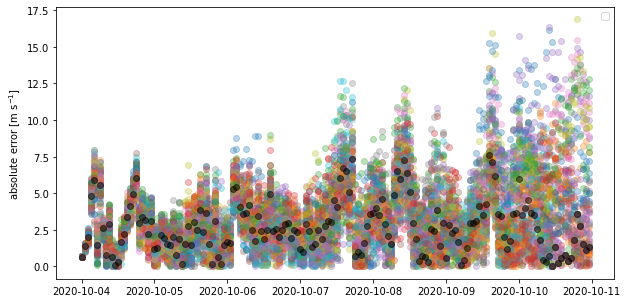

In [322]:
plot_ae_t_scatter(p_ae_df, 'avg', legend=False)

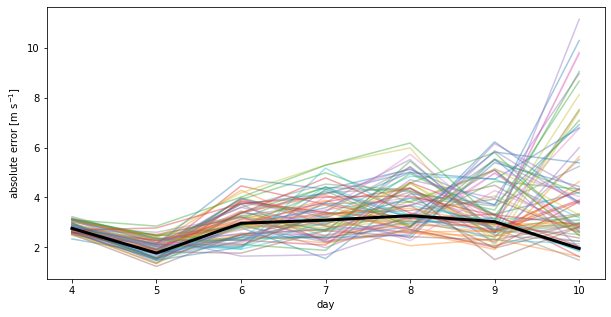

In [332]:
p_ae_daymean_df = p_ae_df.groupby(p_ae_df.index.day).mean()

fig, ax = plt.subplots(figsize=(10, 5))

plt.gca().set_prop_cycle(None)

for col in p_ae_daymean_df.drop(columns='avg'): 
    
    plt.plot(p_ae_daymean_df.index, p_ae_daymean_df[col], label=col, alpha=0.4)
    
plt.plot(p_ae_daymean_df['avg'], c='k', label='avg', linewidth=3)
    
plt.xlabel('day')
plt.ylabel(r'absolute error [m s$^{-1}$]')
    
plt.show()

In [333]:
p_rankae_df = pd.DataFrame(columns=p_ae_df.columns)

for index, row in p_ae_df.iterrows():
    
    p_rankae_df.loc[index] = row.rank()

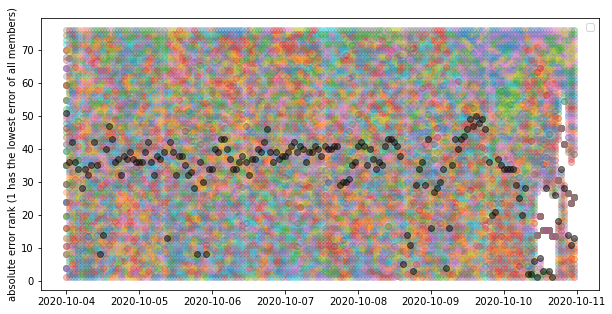

In [385]:
plot_rankae_t_scatter(p_rankae_df, 'avg', legend=False)

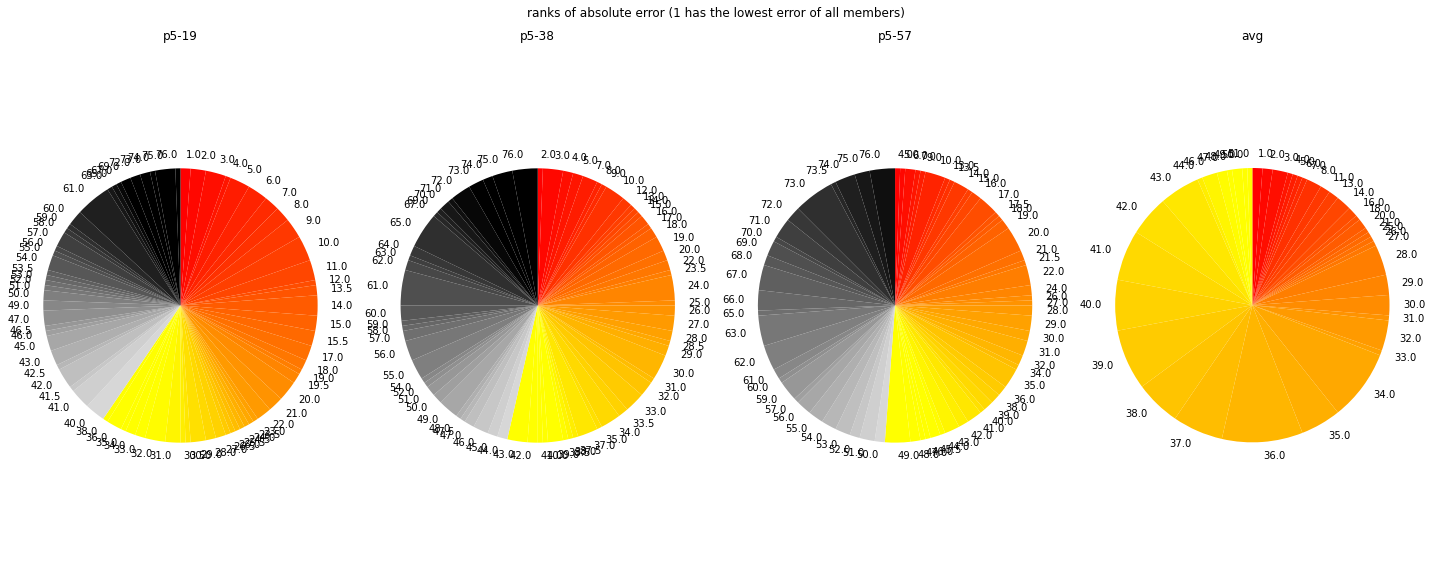

In [375]:
fig, ax = plt.subplots(1, 4, figsize=(20, 8))

unique_n = p_rankae_df.nunique().max()

color_n = math.ceil(unique_n/2)
gray_n = unique_n-color_n

autumns = plt.get_cmap('autumn')(np.arange(color_n)*7)

grays = plt.get_cmap('gray_r')(np.arange(5, gray_n)*8)

ax = ax.ravel()

# list(p_rankae_df.columns[9::19]) + list(p_rankae_df.columns[18::19])
for ind, org in enumerate(list(p_rankae_df.columns[18::19])): 

    ranks_list = sorted(p_rankae_df[org].unique())

    rank_sum_list = []

    for r in ranks_list: 

        rank_sum_list.append((p_rankae_df[org] == r).sum())

    cmap = np.concatenate((autumns, grays))
        
    ax[ind].pie(rank_sum_list, labels=ranks_list, shadow=False, startangle=90, counterclock=False, 
                colors=cmap)

    ax[ind].axis('equal')

    ax[ind].set_title(org, pad=10)

plt.suptitle('ranks of absolute error (1 has the lowest error of all members)')
plt.tight_layout()
plt.show()

#### metrics evaluation

In [4]:
metrics_list = ['rmse', 'crmse', 'nrmse', 'mae', 'bias']

metrics_objs = [eval_tools.get_module_class('metrics', m)() for m in metrics_list]

In [5]:
case = 'fino'
org = 'p5'

in_df = read_ts_df(case, org)

lev_df = pd.DataFrame()

for member in in_df[lev].columns.get_level_values(0).unique(): 

    lev_df[member] = in_df[lev][member][member+'_ws']

lev_df[case] = in_df[lev][member][case+'_ws']

lev_df.dropna(inplace=True)

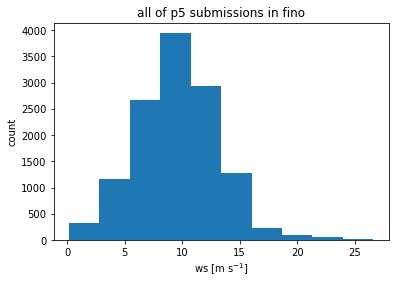

In [6]:
plt.hist(lev_df.values.flatten())
plt.title('all of p5 submissions in fino')
plt.ylabel('count')
plt.xlabel(r'ws [m s$^{-1}$]')
plt.show()

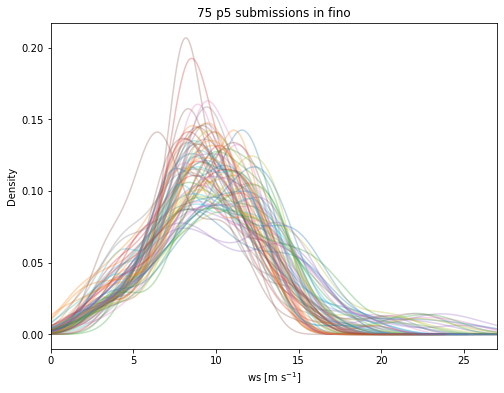

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

for col in lev_df.columns:
    
    ax = lev_df[col].plot.kde(alpha=0.3)
    
    ax.set_xlim(0, 27)
    
plt.title('75 p5 submissions in fino')
plt.xlabel(r'ws [m s$^{-1}$]')

plt.show()

In [60]:
def scatter_hist(x, y, ax, ax_histy, label, alpha=0.25, binwidth=0.25, c=None):
    
    d_size = 5
    
    # no labels
#     ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis='y', labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, s=d_size, alpha=0.6, c=c, label=label)

    # now determine nice limits by hand:
#     binwidth = np.max(np.abs(y))/10
#     binwidth = 0.25
#     xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
#     lim = (int(xymax/binwidth) + 1) * binwidth
    
    
#     ylim = (int(np.max(y)/binwidth) + 1) * binwidth
#     bins = np.arange(np.min(y), ylim + binwidth, binwidth)
    
#     print(y)
    
    bins = np.arange(np.nanmin(y), np.nanmax(y) + binwidth, binwidth)
    
# #     ax_histx.hist(x, bins=bins)
#     ax_histy.hist(y, bins=bins, orientation='horizontal')

#     print(bins)

#     if alpha is None: 
#         ax_histy.hist(y, bins=bins, orientation='horizontal', alpha=0.25, color=c)
#     else: 
    ax_histy.hist(y, bins=bins, orientation='horizontal', alpha=alpha, color=c)

In [75]:
def plot_lev_group_metrics(lev_group_dict):

    for m_o in metrics_objs: 

        fig = plt.figure(figsize=(8, 6))

        gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.05, hspace=0.05)

        ax = fig.add_subplot(gs[1, 0])
        ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

        m_list = []

        m_name = str(m_o.__class__).split('.')[1]

        if m_name == 'nrmse':
            bw = 0.03
        else:
            bw = 0.25

        for org in list(lev_df.columns.drop([case])): 

            m_list.append(m_o.compute(lev_df[case], lev_df[org]))

        scatter_hist(m_list, m_list, ax, ax_histy, label='100% data', alpha=0.4, c='k', binwidth=bw)

        for group in lev_group_dict.keys():

            m_list2 = []

            sub_df = lev_group_dict[group][0].drop(columns=case)

            for org in list(lev_df.columns.drop([case])): 

                m_list2.append(m_o.compute(lev_df[case], sub_df[org]))

            pct = np.round(100*(1 - sub_df.isna().sum().sum()/(sub_df.shape[0]*sub_df.shape[1])), 1)

            scatter_hist(m_list, m_list2, ax, ax_histy, label=str(pct)+'% data '+group, binwidth=bw)

        ax.set_title(m_name)

        ax.set_xlabel(m_name+r' [m s$^{-1}$]')
        ax.set_ylabel(m_name+r' based on modified data [m s$^{-1}$]')
        ax.legend()

        ax_histy.set_xlabel('count')

        plt.show()

In [ ]:
randomized sampling??

In [398]:
lev_df['fino']

t
2020-10-04 00:00:00     9.29
2020-10-04 01:00:00     6.29
2020-10-04 02:00:00     5.11
2020-10-04 03:00:00     3.54
2020-10-04 04:00:00     2.44
                       ...  
2020-10-10 19:00:00     8.51
2020-10-10 20:00:00     9.01
2020-10-10 21:00:00    10.01
2020-10-10 22:00:00    10.25
2020-10-10 23:00:00    10.08
Name: fino, Length: 168, dtype: float64

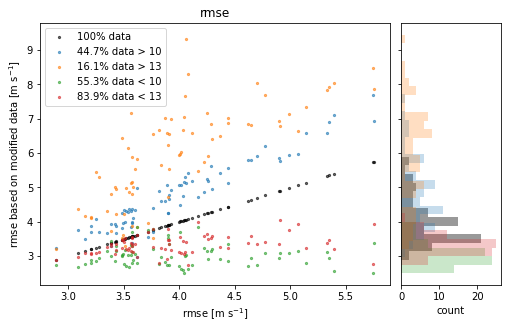

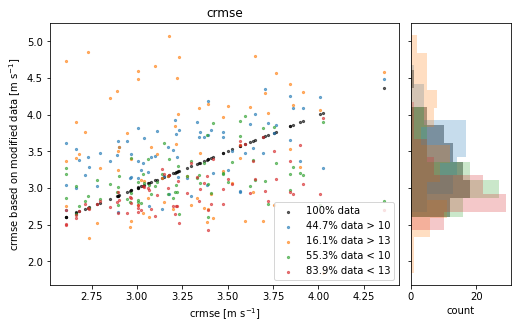

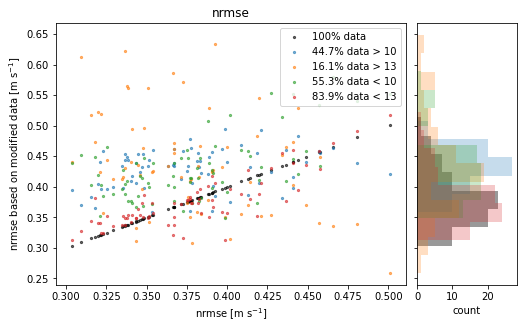

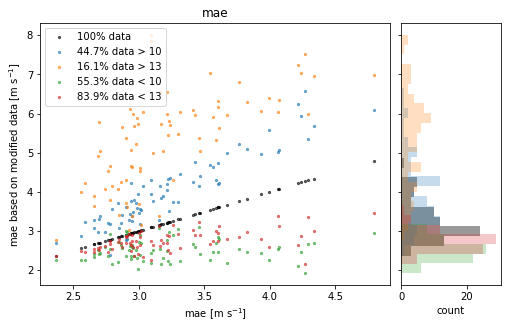

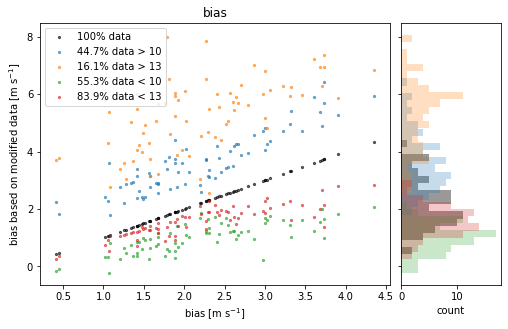

In [76]:
lev_group_dict = {'> 10': [lev_df.where(lev_df > 10, np.nan)], 
                  '> 13': [lev_df.where(lev_df > 13, np.nan)], 
                  '< 10': [lev_df.where(lev_df < 10, np.nan)], 
                  '< 13': [lev_df.where(lev_df < 13, np.nan)]}

plot_lev_group_metrics(lev_group_dict)

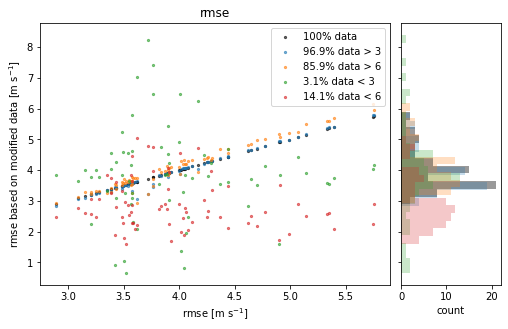

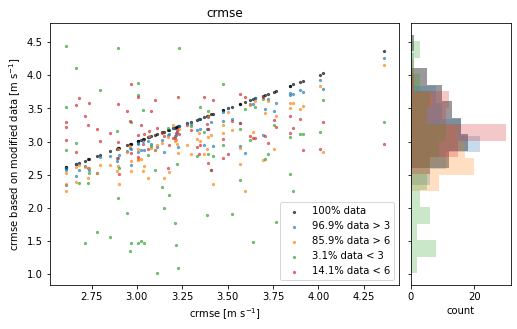

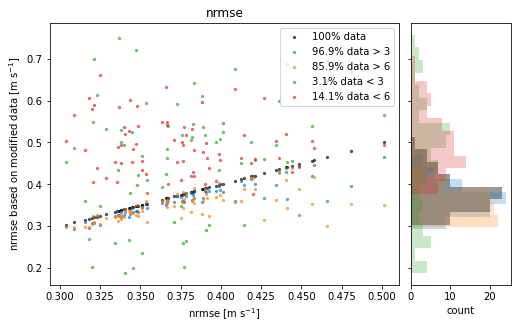

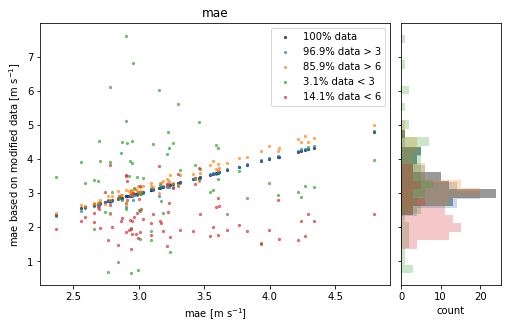

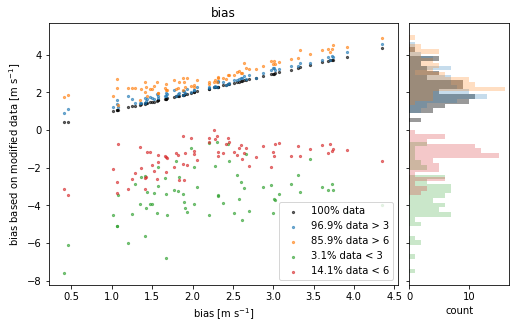

In [77]:
lev_group_dict = {'> 3': [lev_df.where(lev_df > 3, np.nan)], 
                  '> 6': [lev_df.where(lev_df > 6, np.nan)], 
                  '< 3': [lev_df.where(lev_df < 3, np.nan)], 
                  '< 6': [lev_df.where(lev_df < 6, np.nan)]}

plot_lev_group_metrics(lev_group_dict)

## Metrics

In [36]:
def read_metrics_df(case, org):

    return pd.read_csv(main_dir+'output/'+case+'/metrics_'+org+'.csv', header=[0, 1, 2], index_col=[0])

def get_metrics_df(case, org_list):

    for ind, org in enumerate(org_list):

        df = read_metrics_df(case, org)

        if ind == 0: 
            df_metrics = df
        else:
            df_metrics = df_metrics.join(df)
            
    return df_metrics

df_metrics_us = get_metrics_df('us', ['p2', 'p4', 'p1', 'p5'])

df_metrics_fino = get_metrics_df('fino', ['p2', 'p4', 'p1', 'p5', 'p3'])

In [40]:
def plot_metric_hist(df, metric): 
    
#     hgt_list = sorted(df.columns.levels[0].astype(int))
    hgt_list = sorted(df.columns.levels[0].astype(int))[0], sorted(df.columns.levels[0].astype(int))[-1]
#     hgt_list = sorted(df.columns.levels[0].astype(int))[0], sorted(df.columns.levels[0].astype(int))[1]
    
    for hgt in hgt_list: 
    
#     plt.hist(df['40'].loc[df.index == metric].values[0], alpha=0.5, label='40')
#     plt.hist(df['80'].loc[df.index == metric].values[0], alpha=0.5, label='80')
#     plt.hist(df['120'].loc[df.index == metric].values[0], alpha=0.5, label='120')

        plt.hist(df[str(hgt)].loc[df.index == metric].values[0], alpha=0.5, label=str(hgt))

    plt.title(metric)
    plt.legend()
    plt.show()

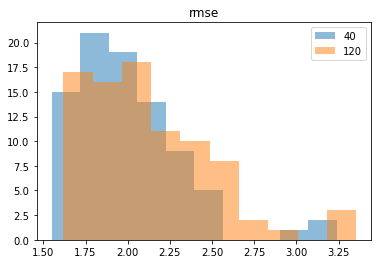

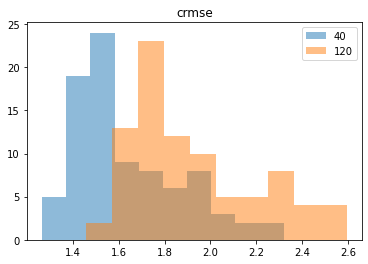

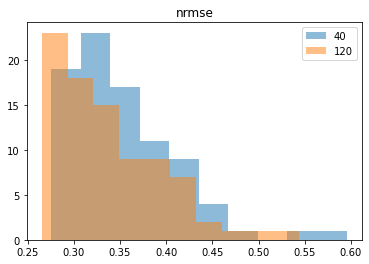

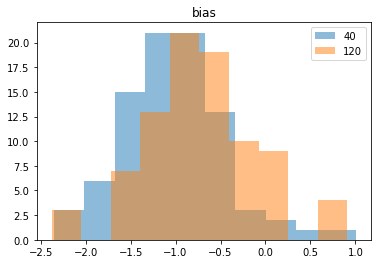

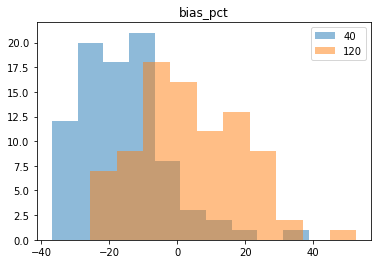

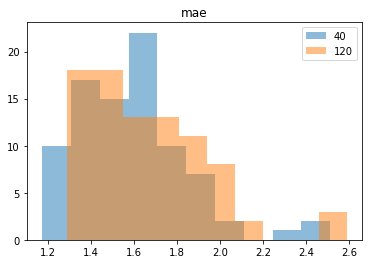

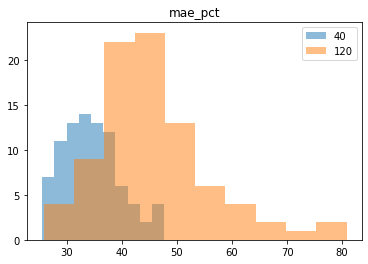

In [42]:
for m in df_metrics_us.index:
    plot_metric_hist(df_metrics_us, m)

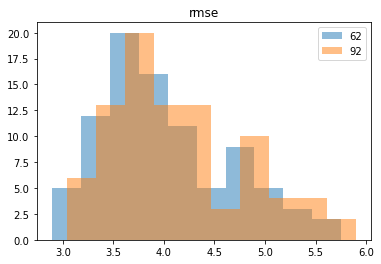

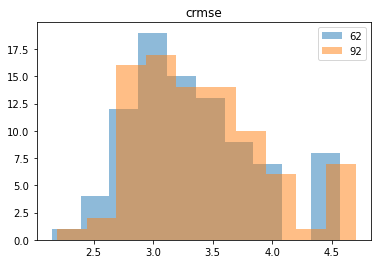

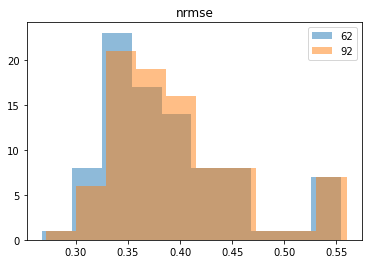

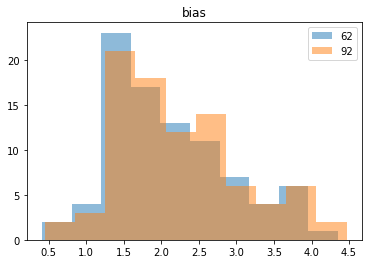

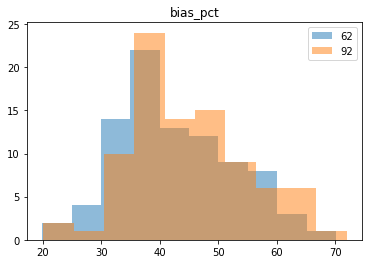

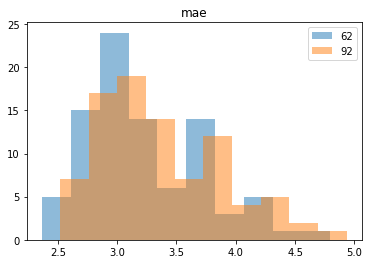

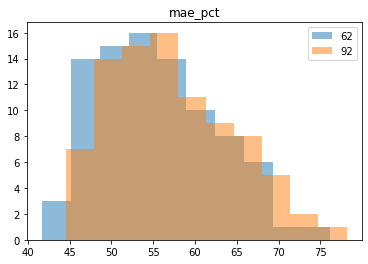

In [43]:
for m in df_metrics_fino.index:
    plot_metric_hist(df_metrics_fino, m)

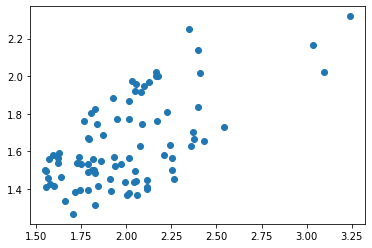

In [98]:
plt.scatter(df_metrics['40'].loc[df_metrics.index == 'rmse'].values[0], 
            df_metrics['40'].loc[df_metrics.index == 'crmse'].values[0])
plt.show()

In [122]:
np.corrcoef(df_metrics['40'].loc[df_metrics.index == 'rmse'].values[0], df_metrics['40'].loc[df_metrics.index == 'crmse'].values[0])[0, 1]

0.6156857351767442

In [100]:
df_metrics['40'].loc[df_metrics.index == 'crmse'].values[0]

array([2.31873773, 2.16716608, 1.94661318, 1.97046557, 1.99867277,
       1.99878094, 2.24969016, 1.76038349, 2.13704293, 1.86745727,
       1.9747124 , 1.39519981, 1.53599445, 1.54983513, 1.49976888,
       1.39315367, 2.02214389, 1.77371071, 1.53153756, 1.66962728,
       1.52981001, 1.9162796 , 1.42504289, 1.41626483, 1.46566567,
       1.53098724, 1.55952728, 1.82346224, 1.49772185, 1.57782337,
       1.45679475, 1.55648353, 1.80247485, 1.53767888, 1.58867346,
       1.50194458, 1.56922186, 1.31326966, 1.45219454, 1.43593736,
       1.37001312, 1.95693111, 1.44504016, 1.58159424, 1.44110934,
       1.39826996, 1.56979903, 1.38592698, 1.62700543, 1.43615383,
       1.36687858, 1.88290213, 1.68661796, 1.56464337, 1.45033289,
       1.26671013, 1.92293861, 1.41112504, 1.49741367, 1.48920794,
       1.33608583, 1.65742223, 1.41028084, 1.72962779, 1.66765538,
       1.49841669, 1.77138218, 1.37643332, 1.70359327, 1.6297651 ,
       1.56362217, 1.56398784, 1.38609551, 2.0160561 , 2.02063

In [108]:
for row in zip(df_metrics.index, df_metrics.index):
    print(row)

('rmse', 'rmse')
('crmse', 'crmse')
('bias', 'bias')
('bias_pct', 'bias_pct')
('mae', 'mae')
('mae_pct', 'mae_pct')


In [165]:
sorted(df_metrics_us.columns.levels[0].astype(int))

[40, 80, 120]

In [172]:
for ind, hgt in enumerate(sorted(df_metrics_us.columns.levels[0].astype(int))):
    
    r_dum = pd.DataFrame()

    for pair in list(itertools.combinations(df_metrics_us.index, 2)):
#         print(pair)
#         print(pair[0])

        r = np.corrcoef(df_metrics_us[str(hgt)].loc[df_metrics_us.index == pair[0]].values[0], 
                        df_metrics_us[str(hgt)].loc[df_metrics_us.index == pair[1]].values[0])[0, 1]


        r_dum[pair[0]+'-'+pair[1]] = [r]

#         print(r)

    r_dum.rename({0: hgt}, inplace=True)
    
    print(r_dum)

    print(ind)
    
    if ind == 0: 
        r_summary = r_dum
    else:
        r_summary = r_summary.append(r_dum)

    rmse-crmse  rmse-bias  rmse-bias_pct  rmse-mae  rmse-mae_pct  crmse-bias  \
40    0.615686  -0.697763      -0.495468  0.978753      0.810237    0.005719   

    crmse-bias_pct  crmse-mae  crmse-mae_pct  bias-bias_pct  bias-mae  \
40        0.168306   0.536168       0.626429       0.914887 -0.730432   

    bias-mae_pct  bias_pct-mae  bias_pct-mae_pct  mae-mae_pct  
40     -0.369481     -0.563546         -0.214003     0.852666  
0
    rmse-crmse  rmse-bias  rmse-bias_pct  rmse-mae  rmse-mae_pct  crmse-bias  \
80    0.746686  -0.620774      -0.481755  0.977299      0.801928      -0.035   

    crmse-bias_pct  crmse-mae  crmse-mae_pct  bias-bias_pct  bias-mae  \
80        0.029477   0.686741        0.67475       0.906817 -0.652325   

    bias-mae_pct  bias_pct-mae  bias_pct-mae_pct  mae-mae_pct  
80     -0.365314     -0.541659          -0.28634     0.855105  
1
     rmse-crmse  rmse-bias  rmse-bias_pct  rmse-mae  rmse-mae_pct  crmse-bias  \
120    0.832182  -0.562612      -0.365543  

In [173]:
r_summary

rmse-crmse  rmse-bias  rmse-bias_pct  rmse-mae  rmse-mae_pct  crmse-bias  \
40     0.615686  -0.697763      -0.495468  0.978753      0.810237    0.005719   
80     0.746686  -0.620774      -0.481755  0.977299      0.801928   -0.035000   
120    0.832182  -0.562612      -0.365543  0.973728      0.305362   -0.111806   

     crmse-bias_pct  crmse-mae  crmse-mae_pct  bias-bias_pct  bias-mae  \
40         0.168306   0.536168       0.626429       0.914887 -0.730432   
80         0.029477   0.686741       0.674750       0.906817 -0.652325   
120       -0.156983   0.804390       0.199646       0.584322 -0.562872   

     bias-mae_pct  bias_pct-mae  bias_pct-mae_pct  mae-mae_pct  
40      -0.369481     -0.563546         -0.214003     0.852666  
80      -0.365314     -0.541659         -0.286340     0.855105  
120     -0.217377     -0.455366          0.559404     0.251248

In [163]:
r_summary.rename({0: 'total'})

rmse-crmse  rmse-bias  rmse-bias_pct  rmse-mae  rmse-mae_pct  \
total    0.615686  -0.697763      -0.495468  0.978753      0.810237   

       crmse-bias  crmse-bias_pct  crmse-mae  crmse-mae_pct  bias-bias_pct  \
total    0.005719        0.168306   0.536168       0.626429       0.914887   

       bias-mae  bias-mae_pct  bias_pct-mae  bias_pct-mae_pct  mae-mae_pct  
total -0.730432     -0.369481     -0.563546         -0.214003     0.852666

### 30 min vs 60 min

In [45]:
df_metrics_us_30 = get_metrics_df('us', ['p2', 'p4', 'p1'])
df_metrics_us_60 = get_metrics_df('us/60min', ['p2', 'p4', 'p1'])

df_metrics_fino_30 = get_metrics_df('fino', ['p2', 'p4', 'p1', 'p3'])
df_metrics_fino_60 = get_metrics_df('fino/60min', ['p2', 'p4', 'p1', 'p3'])

In [46]:
df_metrics_us_30

40                    80                   120             \
               p2-1       p2-2       p2-1       p2-2       p2-1       p2-2   
            p2-1_ws    p2-2_ws    p2-1_ws    p2-2_ws    p2-1_ws    p2-2_ws   
rmse       3.240010   3.033471   3.364878   3.155523   3.353622   3.197650   
crmse      2.318738   2.167166   2.474001   2.262455   2.593468   2.365471   
nrmse      0.595209   0.534723   0.585461   0.509882   0.543515   0.481819   
bias      -2.262990  -2.122577  -2.280729  -2.199687  -2.126196  -2.151630   
bias_pct -36.960101 -34.579068 -35.832912 -34.122847 -25.671608 -25.438930   
mae        2.480103   2.359072   2.601562   2.448021   2.578804   2.479674   
mae_pct   47.608359  45.735662  46.069377  43.499233  46.191457  45.868627   

                 40                                   ...        120  \
               p4-1       p4-2       p4-3       p4-4  ...       p4-2   
            p4-1_ws    p4-2_ws    p4-3_ws    p4-4_ws  ...    p4-2_ws   
rmse       2.096215   2.123497   2.173146   2.164018  ...   2.454862   
crmse      1.946613   1.970466   1.998673   1.998781  ...   2.346489   
nrmse      0.408877   0.418767   0.435075   0.430583  ...   0.428375   
bias      -0.777699  -0.791521  -0.853155  -0.829366  ...  -0.721344   
bias_pct  -4.430783  -8.078842  -9.575845  -7.802326  ... -11.967565   
mae        1.607864   1.620689   1.685233   1.683062  ...   1.899133   
mae_pct   34.582046  34.133127  36.725201  36.889527  ...  32.425942   

                                                                            \
               p4-3       p4-4       p4-5       p4-6       p4-7       p4-8   
            p4-3_ws    p4-4_ws    p4-5_ws    p4-6_ws    p4-7_ws    p4-8_ws   
rmse       2.510902   2.525964   2.531131   1.817847   2.774149   2.331547   
crmse      2.344036   2.365960   2.421273   1.812444   2.528783   2.256735   
nrmse      0.448190   0.448248   0.419450   0.298086   0.499497   0.403246   
bias      -0.900070  -0.884719  -0.737605  -0.140054  -1.140684  -0.585882   
bias_pct -17.381314 -15.966122   2.111305  -2.491020 -17.691522  -5.043878   
mae        1.935363   1.930802   2.032431   1.454014   2.186242   1.789778   
mae_pct   32.660390  31.972891  42.223683  25.868035  36.923527  35.992735   

                 40         80        120  
                 p1         p1         p1  
              p1_ws      p1_ws      p1_ws  
rmse       2.029357   2.358338   2.626287  
crmse      1.974712   2.274215   2.535024  
nrmse      0.353038   0.353090   0.358035  
bias       0.467761   0.624263   0.686322  
bias_pct  16.822186  12.701559  15.104828  
mae        1.550987   1.752744   1.938592  
mae_pct   36.889154  33.156328  37.869157  

[7 rows x 33 columns]

In [47]:
def plot_metric_2hist(df1, df2, metric): 
    
    hgt_list = sorted(df1.columns.levels[0].astype(int))
#     hgt_list = sorted(df.columns.levels[0].astype(int))[0], sorted(df.columns.levels[0].astype(int))[-1]
#     hgt_list = sorted(df.columns.levels[0].astype(int))[0], sorted(df.columns.levels[0].astype(int))[1]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
    
    for hgt in hgt_list: 
    
#     plt.hist(df['40'].loc[df.index == metric].values[0], alpha=0.5, label='40')
#     plt.hist(df['80'].loc[df.index == metric].values[0], alpha=0.5, label='80')
#     plt.hist(df['120'].loc[df.index == metric].values[0], alpha=0.5, label='120')

        ax1.hist(df1[str(hgt)].loc[df1.index == metric].values[0], alpha=0.5, label=str(hgt))
        ax2.hist(df2[str(hgt)].loc[df2.index == metric].values[0], alpha=0.5, label=str(hgt))
    
#     x_min = np.min(plt.getp(ax1, 'xlim')[0], plt.getp(ax2, 'xlim')[0])
#     x_max = np.max(plt.getp(ax1, 'xlim')[-1], plt.getp(ax2, 'xlim')[-1])
    
#     y_min = np.min(plt.getp(ax1, 'ylim')[0], plt.getp(ax2, 'ylim')[0])
#     y_max = np.max(plt.getp(ax1, 'ylim')[-1], plt.getp(ax2, 'ylim')[-1])
        
#     ax1.set_xlim()
        
    ax1.set_title(metric+' 30 min avg')
    ax2.set_title(metric+' 60 min avg')
    
    ax1.legend()
    ax2.legend()
    
    plt.show()

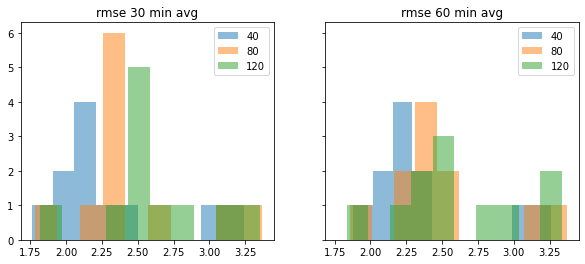

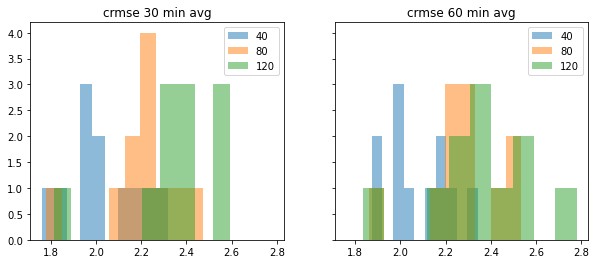

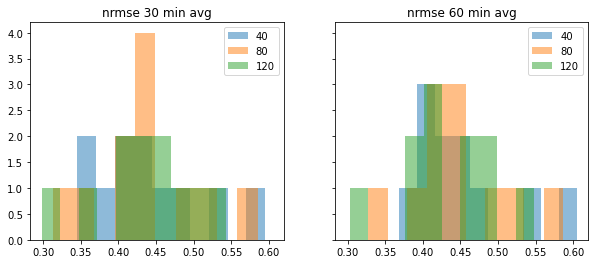

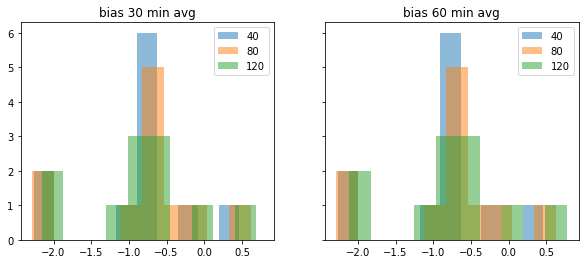

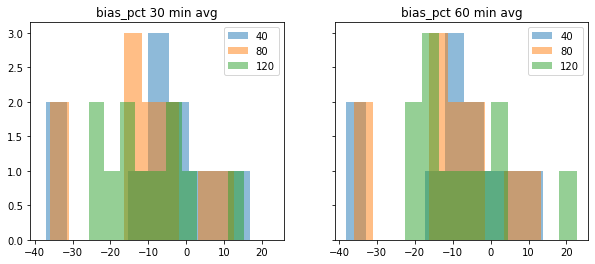

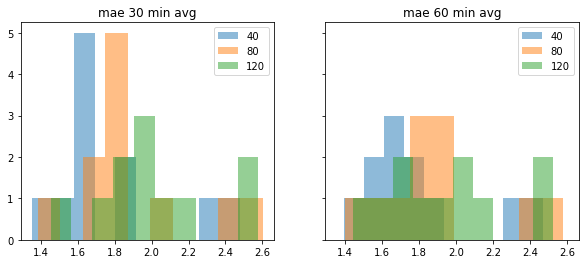

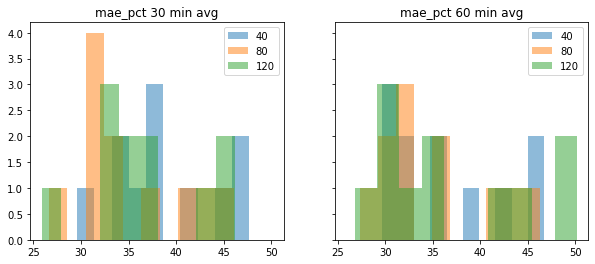

In [48]:
for m in df_metrics_us_30.index:
    plot_metric_2hist(df_metrics_us_30, df_metrics_us_60, m)

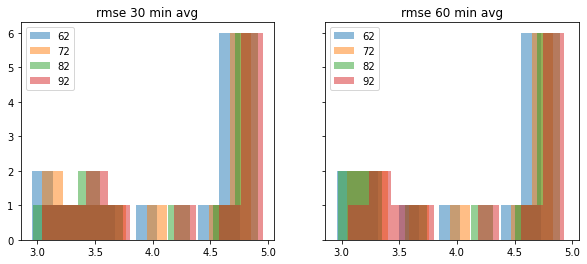

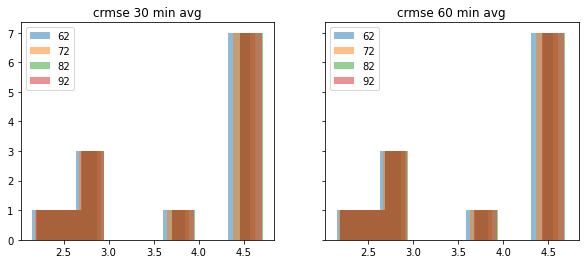

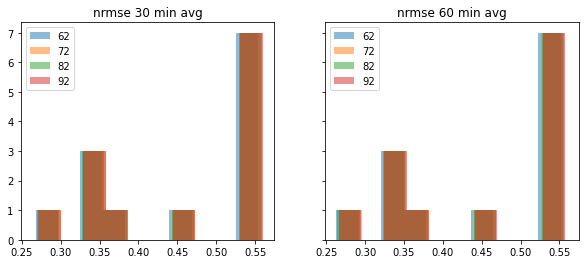

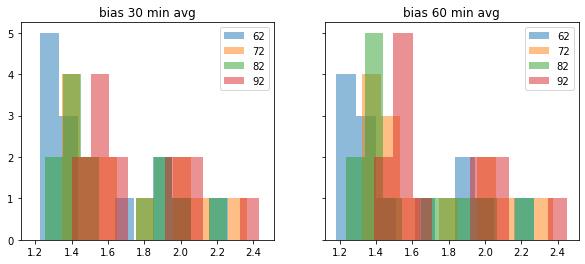

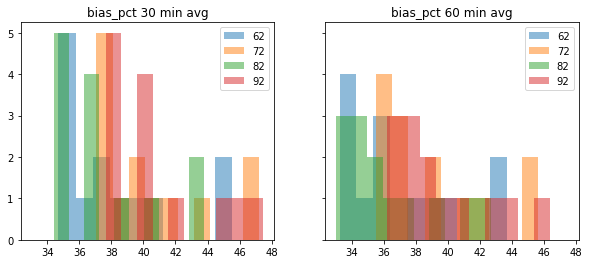

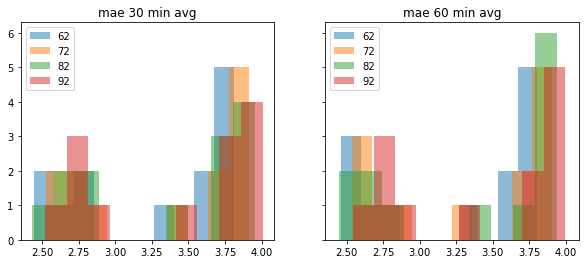

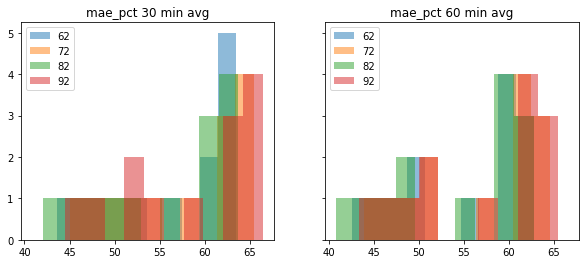

In [162]:
for m in df_metrics_fino_30.index:
    plot_metric_2hist(df_metrics_fino_30, df_metrics_fino_60, m)

### 60 min vs 120 min

In [49]:
def plot_metric_3hist(df1, df2, df3, metric): 
    
    hgt_list = sorted(df1.columns.levels[0].astype(int))
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
    
    for hgt in hgt_list: 

        ax1.hist(df1[str(hgt)].loc[df1.index == metric].values[0], alpha=0.5, label=str(hgt))
        ax2.hist(df2[str(hgt)].loc[df2.index == metric].values[0], alpha=0.5, label=str(hgt))
        ax3.hist(df3[str(hgt)].loc[df3.index == metric].values[0], alpha=0.5, label=str(hgt))
        
    ax1.set_title(metric+' 60 min avg')
    ax2.set_title(metric+' 120 min avg')
    ax3.set_title(metric+' 180 min avg')
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    
    plt.show()

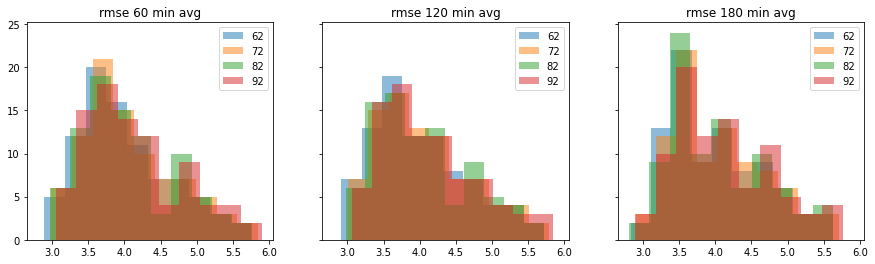

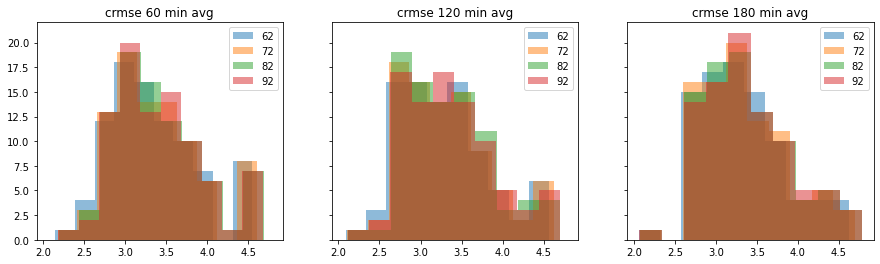

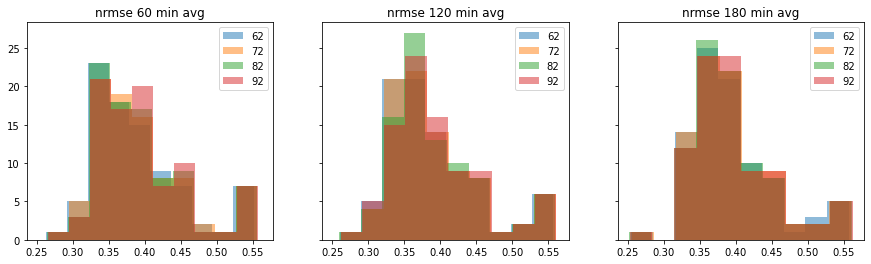

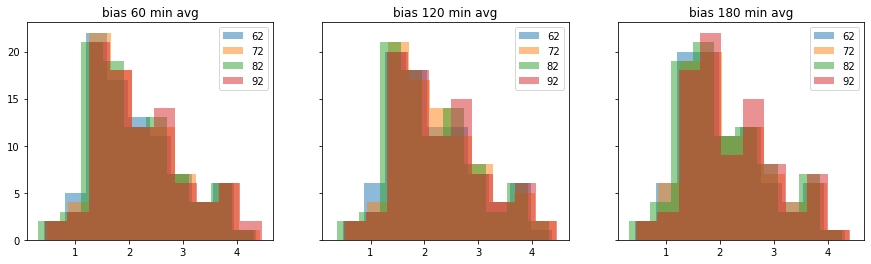

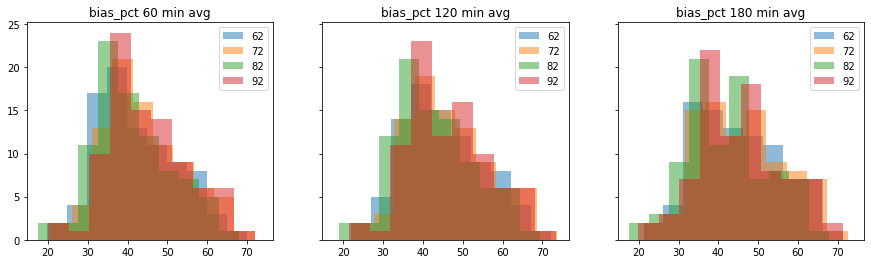

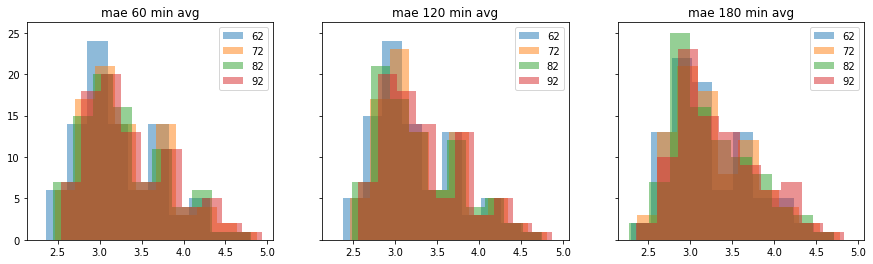

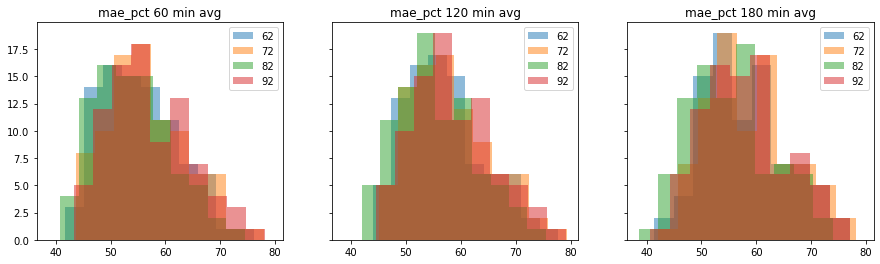

In [50]:
df_metrics_fino_60 = get_metrics_df('fino/60min', ['p2', 'p4', 'p1', 'p3', 'p5'])
df_metrics_fino_120 = get_metrics_df('fino/120min', ['p2', 'p4', 'p1', 'p3', 'p5'])
df_metrics_fino_180 = get_metrics_df('fino/180min', ['p2', 'p4', 'p1', 'p3', 'p5'])

for m in df_metrics_fino_60.index:
    plot_metric_3hist(df_metrics_fino_60, df_metrics_fino_120, df_metrics_fino_180, m)

## Ramps

In [66]:
def get_2x2_allramps_plot(case, lev):

    lev = str(lev)
    
    rdf = get_rampdf(case, 4)
    
    inds = ['true_positive', 'false_positive', 'false_negative', 'true_negative']
    
    rdf_2x2 = rdf.loc(axis=1)[lev, :, :, 'all', : ,:].loc[inds]

    rdf_2x2 = rdf_2x2.xs('all', level=3, axis=1, drop_level=True)
    
    rdf_pct = 100*rdf_2x2/rdf_2x2.sum()
    
    srdf = rdf_pct.T
    srdf.index.set_names(['t1', 't2', 't3', 't4'], inplace=True)
    p_srdf = srdf.pivot_table(index='t4', columns='t3')
    
    plot_2x2(p_srdf, srdf, plot_allramps_contin_legend, 
             case+' case: 2x2 contingency table percentage at '+lev+' m')
    
#     return srdf
    
def get_rampdf(case, head_num):

    file_list = glob.glob(main_dir+'output/'+case+'/ramp_*.csv')

    # exclude p5
    for file in file_list:
        if 'p5' in file:
            file_list.remove(file)

    rdf = pd.DataFrame()
    
    for idx, file in enumerate(file_list):
        
        rdf_file = pd.read_csv(file, header=list(range(0, head_num+1)), index_col=[0])
        
        if idx == 0:
            rdf = rdf_file
        else:
            rdf = rdf.join(rdf_file)
            
    return rdf

def plot_2x2(ps_df, s_df, legend, title_txt, log=False):
    
    m = len(ps_df.columns) // 4
    n = len(ps_df)
    values = [ps_df.sort_index(axis=1)[col] for col in s_df.columns]  # these are the 4 column names in df

    triangul = triangulation_for_triheatmap(m, n)
    cmaps = ['viridis'] * 4
    if log is False:
        norms = [plt.Normalize(ps_df.min().min(), ps_df.max().max()) for _ in range(4)]
    elif log is True: 
        # log(0) is nan and crashes plotting code
        ps_df.replace(0, 1, inplace=True)
        norms = [colors.LogNorm(ps_df.min().min(), ps_df.max().max()) for _ in range(4)]
#     print(ps_df.min().min(), ps_df.max().max())
        
    legend(s_df.columns)
    
#     fig, (axl, ax) = plt.subplots(2, 1, figsize=(10, 4), gridspec_kw={'height_ratios': [1, 3]})
    fig, ax = plt.subplots(figsize=(10, 4))

    imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
            for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]
    # imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, ec='white')
    #         for t, val, cmap in zip(triangul, values, cmaps)]

    ax.tick_params(length=0)
    ax.set_xticks(range(m))
    ax.set_xticklabels(sorted(s_df.index.get_level_values(2).unique()), rotation=90)
    ax.set_yticks(range(n))
    ax.set_yticklabels(ps_df.index)
    ax.invert_yaxis()
    ax.margins(x=0, y=0)
    ax.set_aspect('equal', 'box')  # square cells
    plt.colorbar(imgs[3], ax=ax)
    ax.set_title(title_txt, pad=8)
    
    plt.tight_layout()
    plt.show()
    
def triangulation_for_triheatmap(m, n):
    
    xv, yv = np.meshgrid(np.arange(-0.5, m), np.arange(-0.5, n))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, m), np.arange(0, n))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (m+1)*(n+1)  # indices of the centers

    triangles_top = [(i+j * (m+1), i+1+j * (m+1), cstart+i+j*m)
                  for j in range(n) for i in range(m)]
    triangles_right = [(i+1+j * (m+1), i+1+(j+1) * (m+1), cstart+i+j*m)
                  for j in range(n) for i in range(m)]
    triangles_bot = [(i+1+(j+1) * (m+1), i+(j+1) * (m+1), cstart+i+j*m)
                  for j in range(n) for i in range(m)]
    triangles_left = [(i+(j+1) * (m+1), i+j * (m+1), cstart+i+j*m)
                  for j in range(n) for i in range(m)]
    
    return [Triangulation(x, y, triangles) 
            for triangles in [triangles_top, triangles_right, triangles_bot, triangles_left]]
    
def plot_allramps_contin_legend(txt_list):

    fig, ax = plt.subplots(figsize=(12, 1))

    ax.plot((0, 0, 1, 1, 0, 1, 0, 1), (0, 1, 1, 0, 0, 1, 1, 0), c='k')

    ax.set_xlim(-7, 7)
    ax.text(-1.55, 0.4, txt_list[3], c='k')
    ax.text(-0.2, 1.2, txt_list[0], c='k')
    ax.text(1.2, 0.4, txt_list[1], c='k')
    ax.text(-0.3, -0.35, txt_list[2], c='k')

    ax.axis(False)

    plt.show()

In [67]:
def get_2x2_updownramps_plot(case, lev, updown):

    lev = str(lev)

    rdf = get_rampdf(case, 4)

    inds = ['true_positive', 'false_positive', 'false_negative', 'base_ramp', 'critical_success_index']

    rdf_2x2 = rdf.loc(axis=1)[lev, :, :, updown, :, :].loc[inds]

    rdf_2x2 = rdf_2x2.xs(updown, level=3, axis=1, drop_level=True)

    rdf_pct = 100*rdf_2x2/rdf_2x2.loc['base_ramp']

    rdf_pct.loc['critical_success_index'] = rdf_2x2.loc['critical_success_index']*100

    rdf_pct.drop(['base_ramp'], axis=0, inplace=True)

    srdf = rdf_pct.T
    srdf.index.set_names(['t1', 't2', 't3', 't4'], inplace=True)
    p_srdf = srdf.pivot_table(index='t4', columns='t3')

    plot_2x2(p_srdf, srdf, plot_updownramps_contin_legend, 
             case+' case '+updown+' ramps: parameter percentage\n(divided by baseline ramp number) at '+lev+' m', 
             log=True)
    
#     return srdf
    
def plot_updownramps_contin_legend(txt_list):

    fig, ax = plt.subplots(figsize=(12, 1))

    ax.plot((0, 0, 1, 1, 0, 1, 0, 1), (0, 1, 1, 0, 0, 1, 1, 0), c='k')

    ax.set_xlim(-7, 7)
    ax.text(-2.45, 0.4, txt_list[3], c='k')
    ax.text(-0.2, 1.2, txt_list[0], c='k')
    ax.text(1.2, 0.4, txt_list[1], c='k')
    ax.text(-0.3, -0.35, txt_list[2], c='k')

    ax.axis(False)

    plt.show()

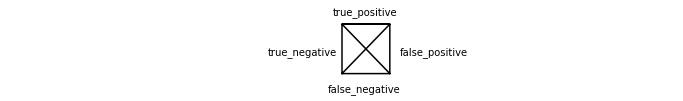

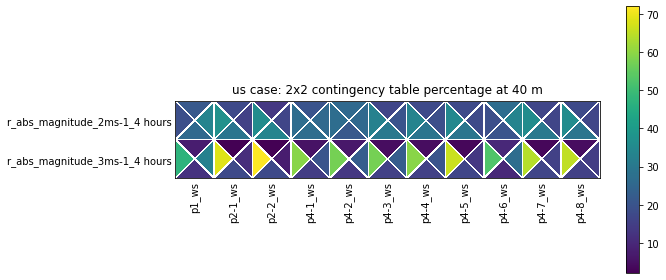

In [68]:
get_2x2_allramps_plot('us', 40)

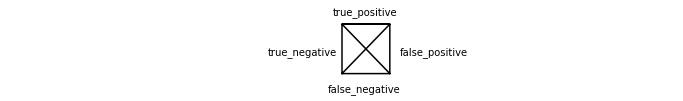

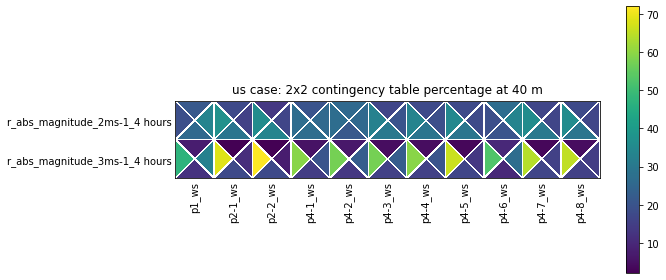

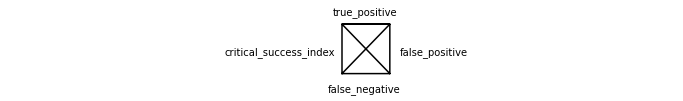

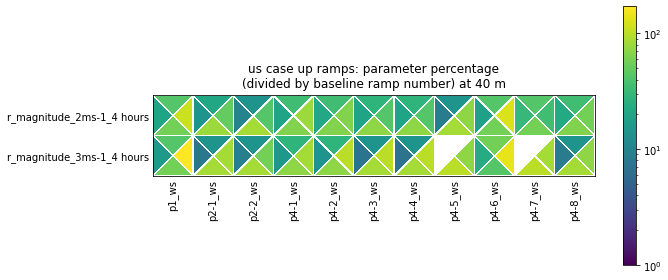

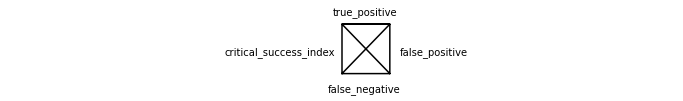

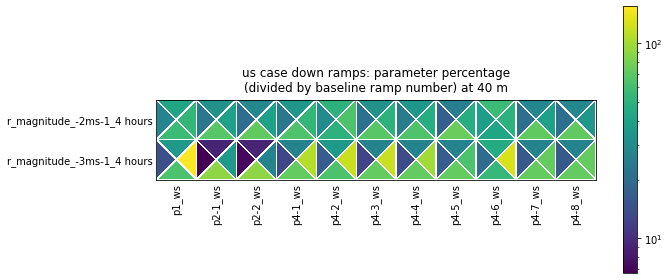

In [69]:
get_2x2_allramps_plot('us', 40)
get_2x2_updownramps_plot('us', 40, 'up')
get_2x2_updownramps_plot('us', 40, 'down')
# get_2x2_allramps_plot('us', 80)
# get_2x2_allramps_plot('us', 120)

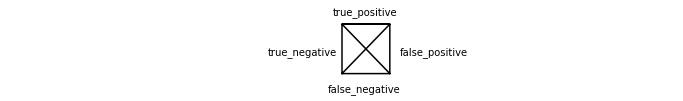

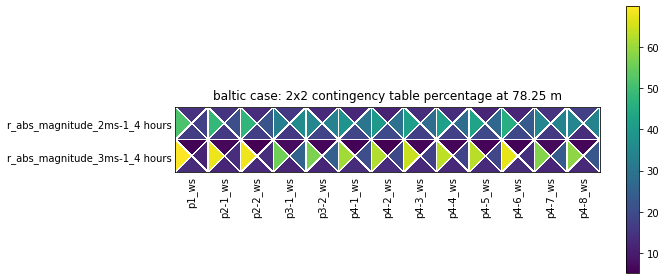

In [75]:
get_2x2_allramps_plot('baltic', 78.25)

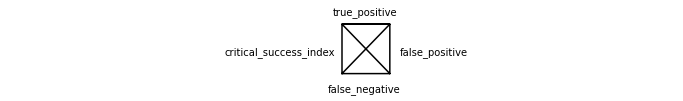

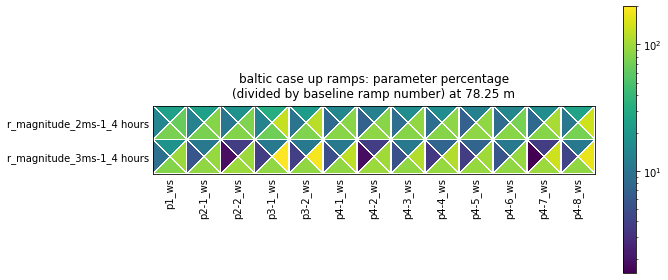

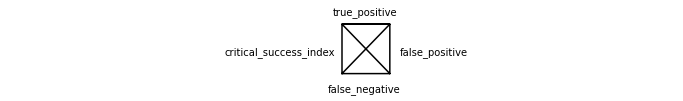

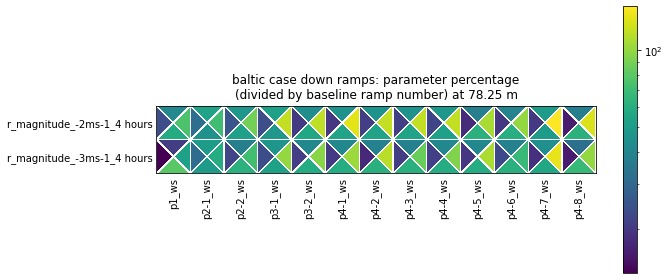

In [76]:
lev = 78.25
case = 'baltic'
get_2x2_updownramps_plot(case, lev, 'up')
get_2x2_updownramps_plot(case, lev, 'down')

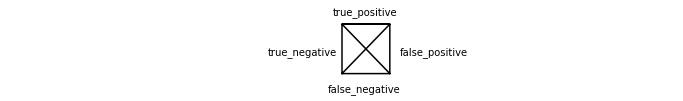

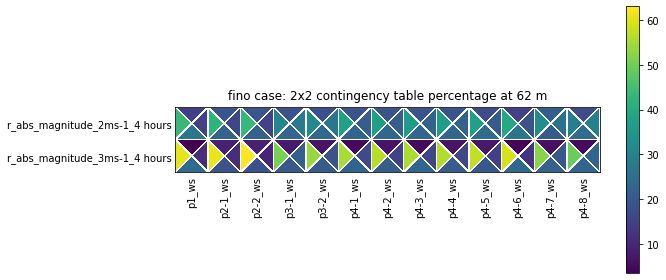

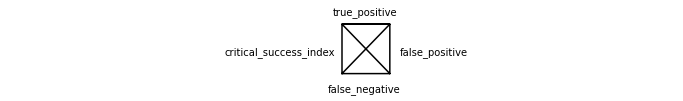

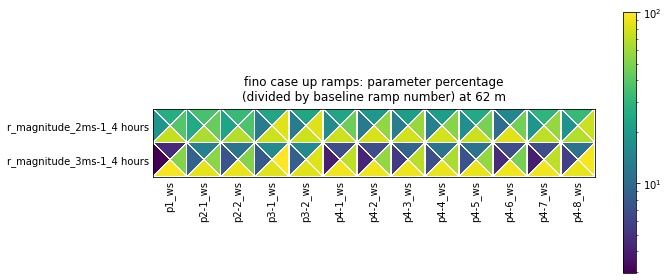

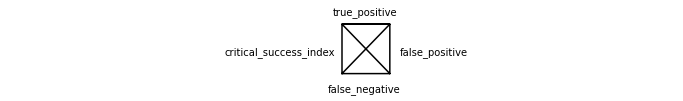

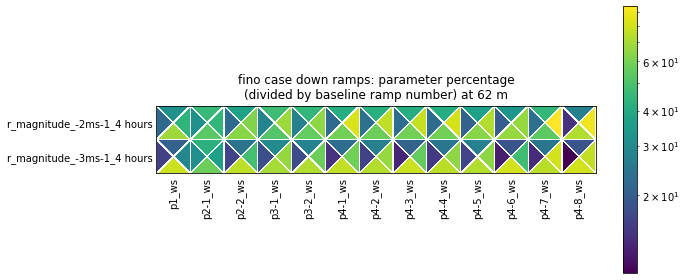

In [77]:
get_2x2_allramps_plot('fino', 62)
get_2x2_updownramps_plot('fino', 62, 'up')
get_2x2_updownramps_plot('fino', 62, 'down')
# get_2x2_plot('fino', 72)
# get_2x2_plot('fino', 82)
# get_2x2_plot('fino', 92)